In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("datasets_596958_1073629_Placement_Data_Full_Class - datasets_596958_1073629_Placement_Data_Full_Class.csv")

In [3]:
data.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [4]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

As we can see here there are 67 null value in salary.
For further graphical representation i plotted heatmap.

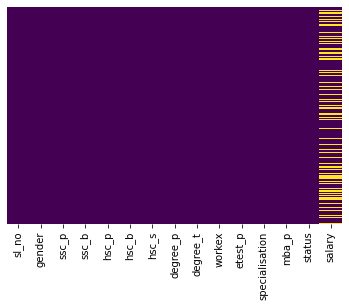

In [5]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap = "viridis")

Separate numerical features, i.e. features with numerical values in them.


In [6]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

data[numerical_features].head()

Number of numerical variables:  7


sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p    salary
0      1  67.00  91.00     58.00     55.0  58.80  270000.0
1      2  79.33  78.33     77.48     86.5  66.28  200000.0
2      3  65.00  68.00     64.00     75.0  57.80  250000.0
3      4  56.00  52.00     52.00     66.0  59.43       NaN
4      5  85.80  73.60     73.30     96.8  55.50  425000.0

Separate categorical features, i.e. features with categorical values in them.

In [7]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(categorical_features))

data[categorical_features].head()

Number of categorical variables:  8


gender    ssc_b    hsc_b     hsc_s   degree_t workex specialisation  \
0      M   Others   Others  Commerce   Sci&Tech     No         Mkt&HR   
1      M  Central   Others   Science   Sci&Tech    Yes        Mkt&Fin   
2      M  Central  Central      Arts  Comm&Mgmt     No        Mkt&Fin   
3      M  Central  Central   Science   Sci&Tech     No         Mkt&HR   
4      M  Central  Central  Commerce  Comm&Mgmt     No        Mkt&Fin   

       status  
0      Placed  
1      Placed  
2      Placed  
3  Not Placed  
4      Placed

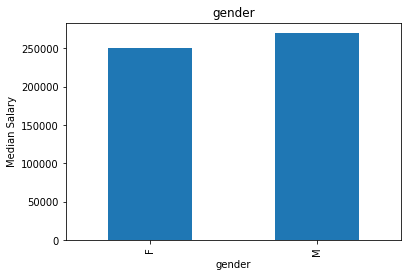

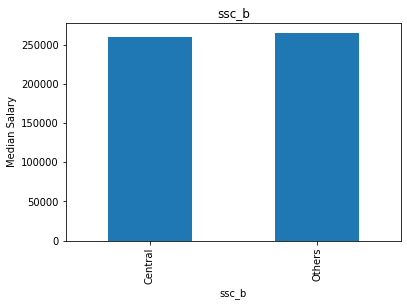

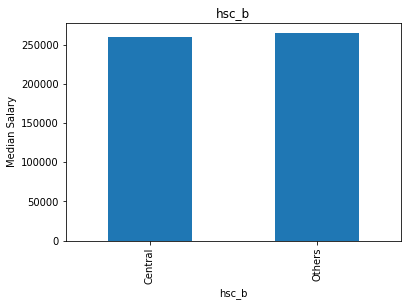

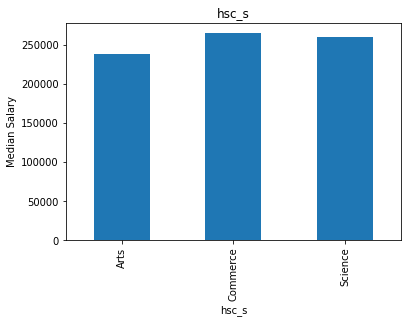

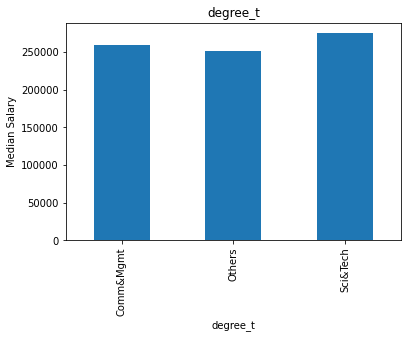

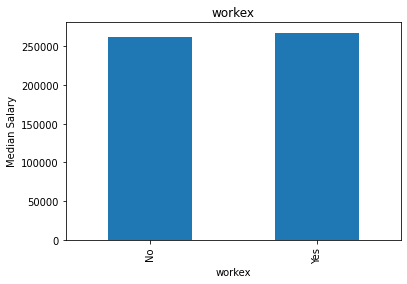

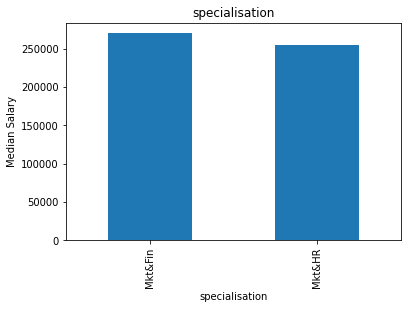

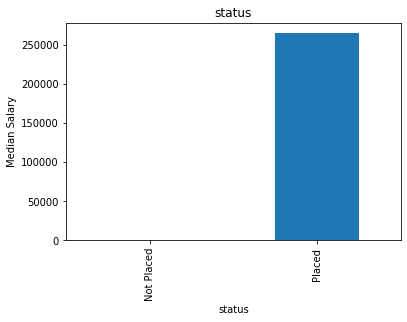

In [9]:
for feature in categorical_features:
    df=data.copy()
    bar = df.groupby(feature)['salary'].median().plot.bar()  
    plt.xlabel(feature)
    plt.ylabel('Median Salary')
    plt.title(feature)
    plt.show()

Some inferences from the above analysis : 


1.   Females has median salary of ~25000, whereas male has ~27000
2.   Students from SSC Board as central has salary ~26000, whereas others has ~27000
3. Students from HSC Board as central has salary ~26000, whereas others has ~27000
4. Students with HSC subjects as Arts has ~23000, Commerce ~26000, Science ~25000
5. Students with degree as Comm&Mgmt has ~26000, Others ~25000, Sci&Tech ~27000
6. Students with No work experience has ~26000 whereas with work experience has ~27000
7. Student with specialisation as Mkt&Fin has ~28000 whereas with Mkt&HR has ~25000
8. Average salary of placed students is ~28000



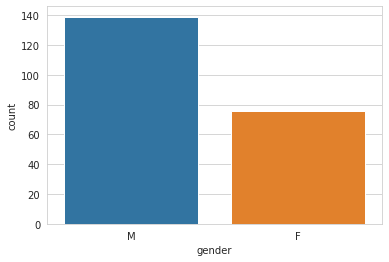

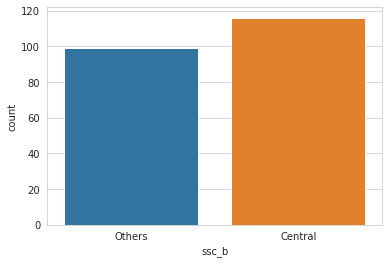

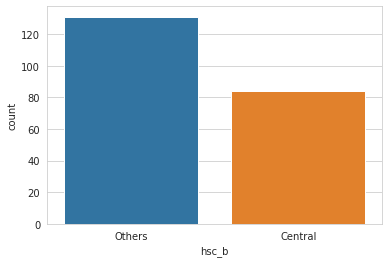

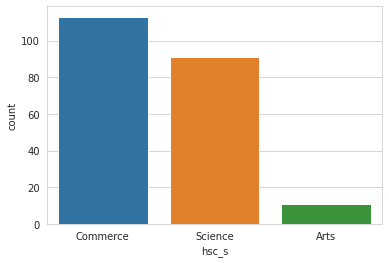

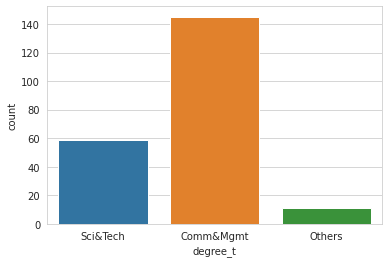

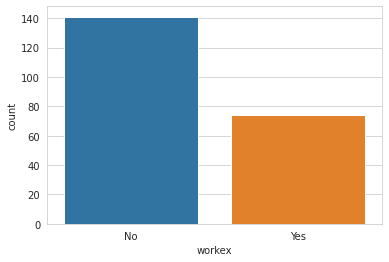

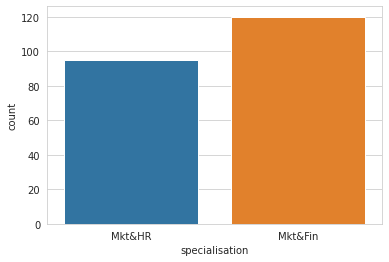

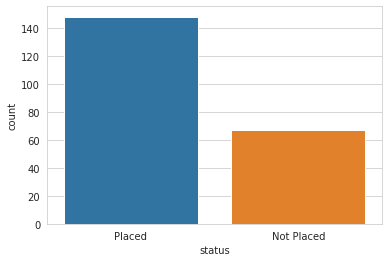

In [10]:
for feature in categorical_features:
    plt.figure()
    sns.set_style("whitegrid")
    sns.countplot(x=feature, data=data)

Some inferences from the above analysis : 


1.   Count of male is ~180 and female is ~70
2.   Count of students from SSC board as central ~110 and others ~100
3. Count of students from HSC board as central ~85 and others ~130
4. Count of students with subjects in HSC as Commerce is ~120, Science ~90, Arts~10
5. Count of students with degree as Comm&Mgmt is ~150, Others ~10, Sci&Tech ~60
6. Count of student with No work experience is ~140 whereas with work experience is ~70
7. Count of student with specialisation as Mkt&Fin is ~120 whereas with Mkt&HR is ~90
8. Count of students placed is ~150, and not placed is ~70

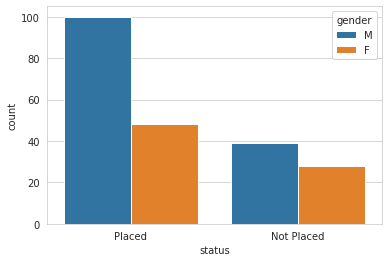

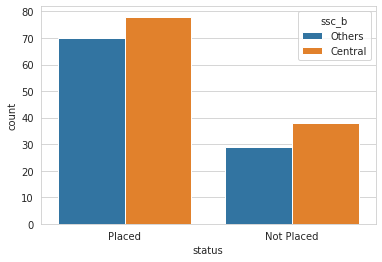

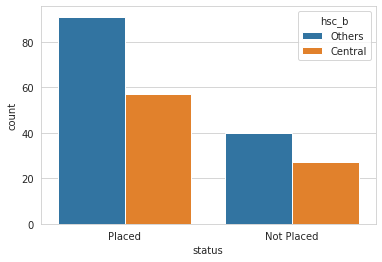

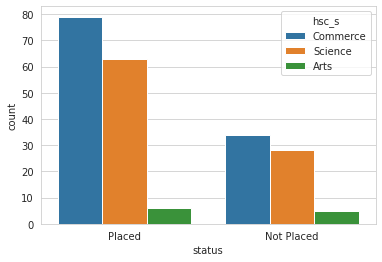

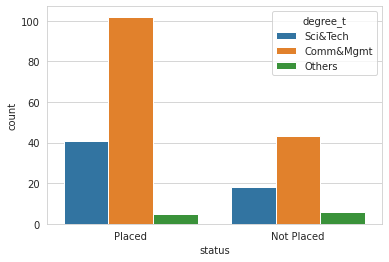

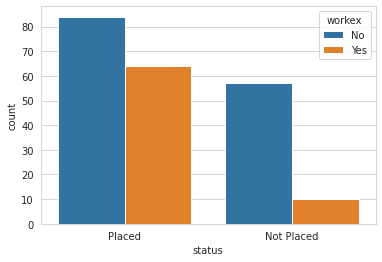

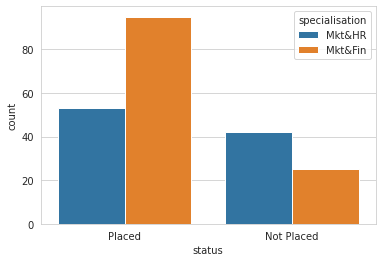

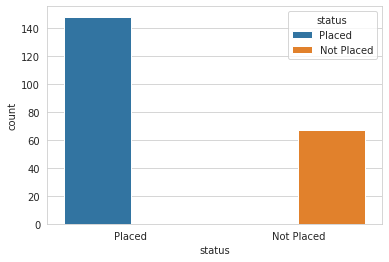

In [11]:
for feature in categorical_features:
    plt.figure()
    sns.set_style("whitegrid")
    sns.countplot(x="status", data=data, hue=feature)

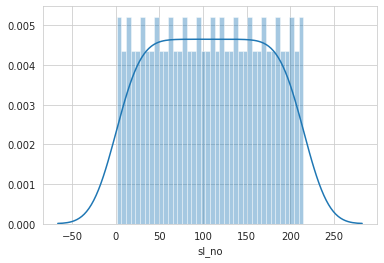

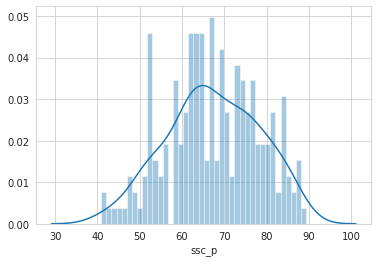

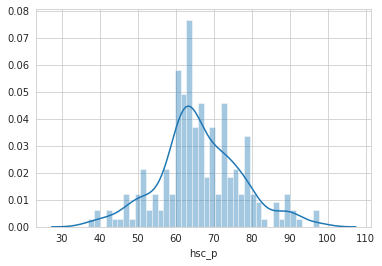

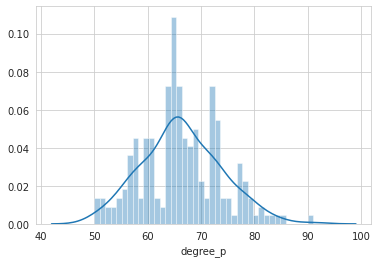

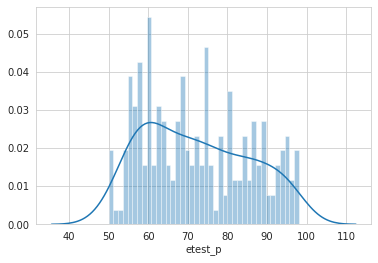

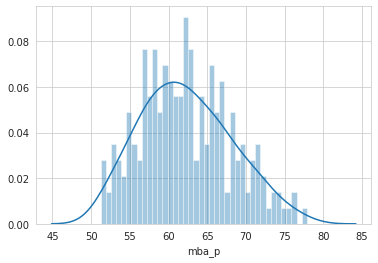

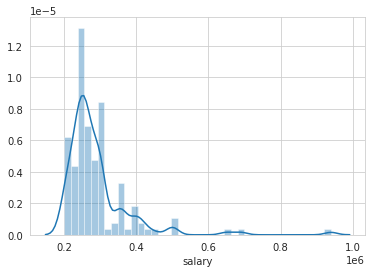

In [12]:
for feature in numerical_features:
    plt.figure()
    sns.distplot(data[feature].dropna(), kde=True ,bins=40)

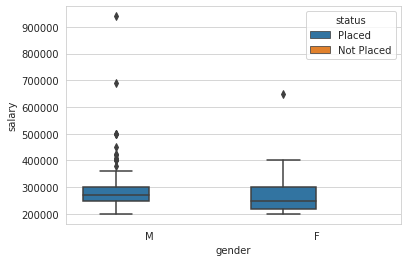

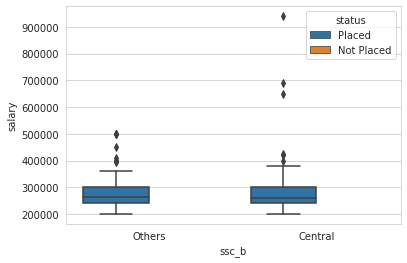

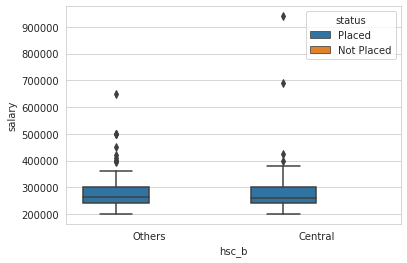

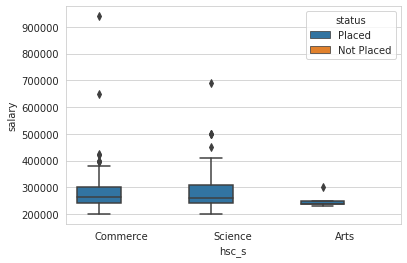

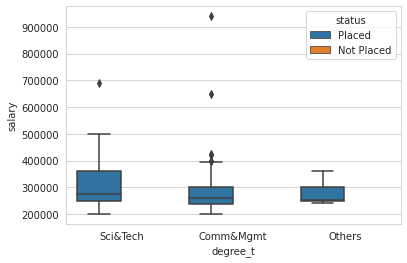

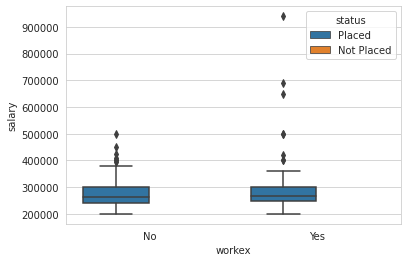

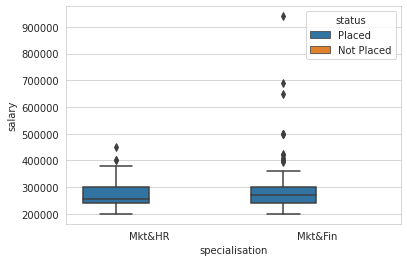

<Figure size 432x288 with 0 Axes>

In [13]:
for feature in categorical_features:
    plt.figure()
    if (feature!='status'):
        sns.boxplot(x=feature, y="salary",hue = 'status', data=data)

We can see the presence of outliers in our data, so to scale our data we would be using Robust Scaler.

Now, we can remove our NaN values in salary with 0, if student is not placed.

In [14]:
##changing salary of not placed to zero

def impute_class(cols):
    salary = cols[0]
    status = cols[1]

    if pd.isnull(salary):
        if status == 'Not Placed':
            return 0
    else:
        return salary
        

data['salary'] = data[["salary", "status"]].apply(impute_class, axis = 1)


In [15]:
data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

As we can see now there is no Nan value available now.

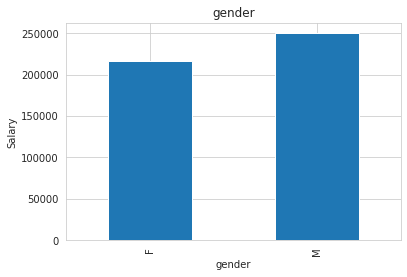

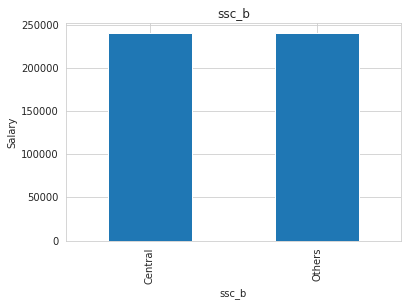

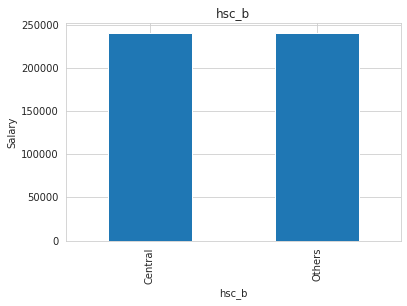

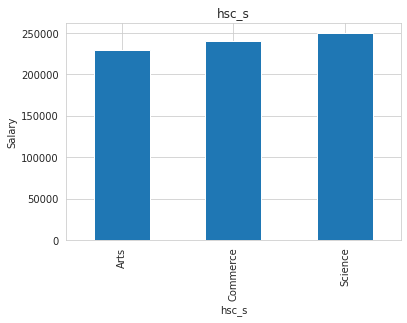

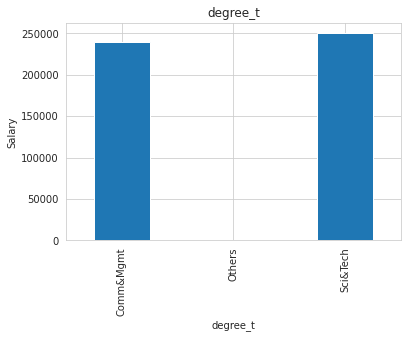

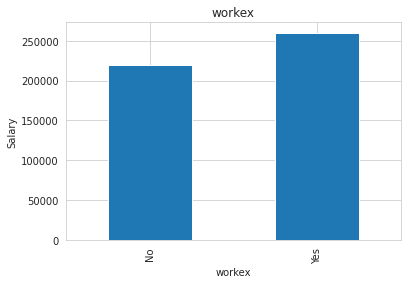

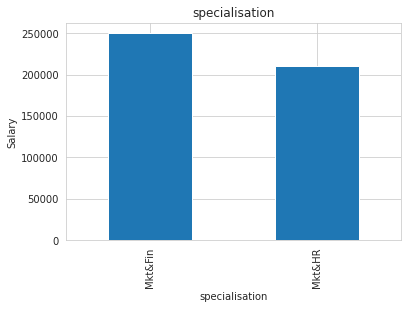

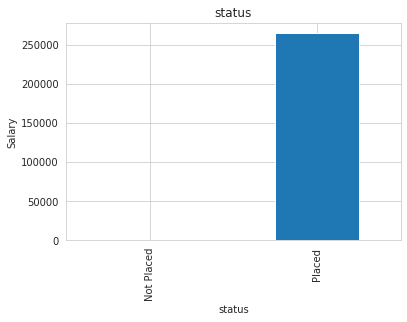

In [16]:
for feature in categorical_features:
    df=data.copy()
    df.groupby(feature)['salary'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Salary')
    plt.title(feature)
    plt.show()

In [17]:
data.corr()

sl_no     ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
sl_no     1.000000 -0.078155 -0.085711 -0.088281  0.063636  0.022327  0.002543
ssc_p    -0.078155  1.000000  0.511472  0.538404  0.261993  0.388478  0.538090
hsc_p    -0.085711  0.511472  1.000000  0.434206  0.245113  0.354823  0.452569
degree_p -0.088281  0.538404  0.434206  1.000000  0.224470  0.402364  0.408371
etest_p   0.063636  0.261993  0.245113  0.224470  1.000000  0.218055  0.186988
mba_p     0.022327  0.388478  0.354823  0.402364  0.218055  1.000000  0.139823
salary    0.002543  0.538090  0.452569  0.408371  0.186988  0.139823  1.000000

From this we can infer that, following variables are correlated to some extent: 


1.   hsc_p & ssc_p
2.   degree_p & ssc_p
3. salary & ssc_p
4. degree_p & hsc_p
5. salary & hsc_p
6. degree_p & mba_p



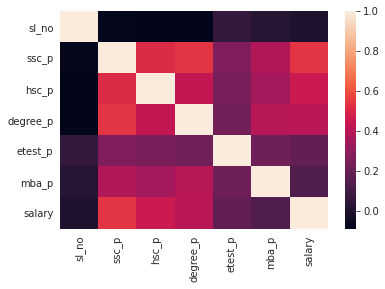

In [18]:
sns.heatmap(data.corr())

<Figure size 432x288 with 0 Axes>

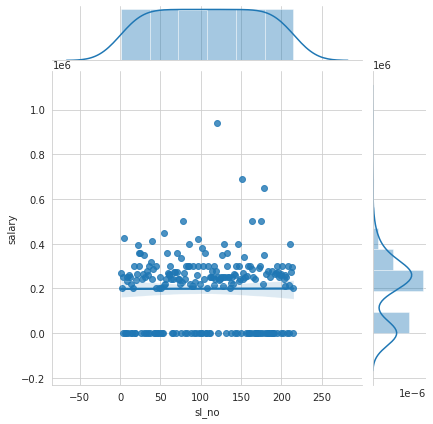

<Figure size 432x288 with 0 Axes>

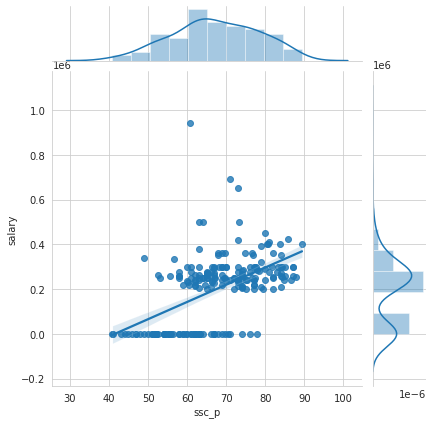

<Figure size 432x288 with 0 Axes>

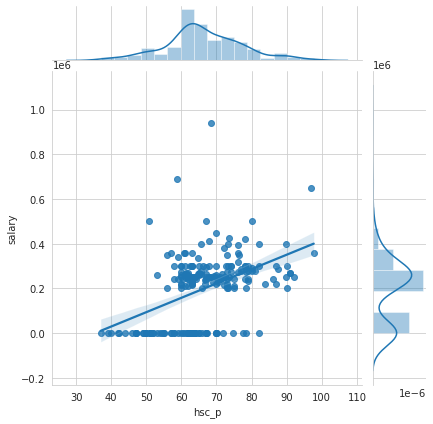

<Figure size 432x288 with 0 Axes>

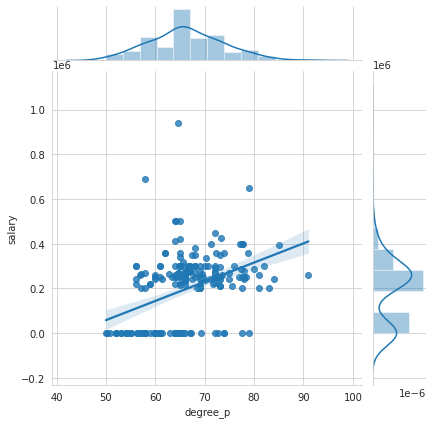

<Figure size 432x288 with 0 Axes>

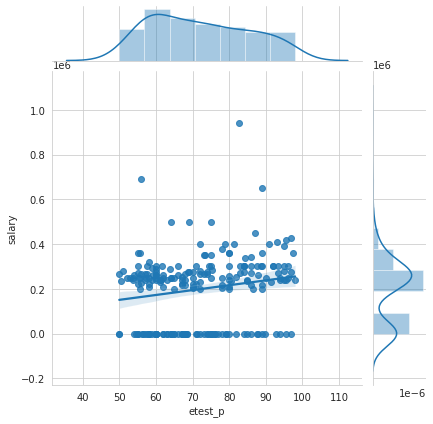

<Figure size 432x288 with 0 Axes>

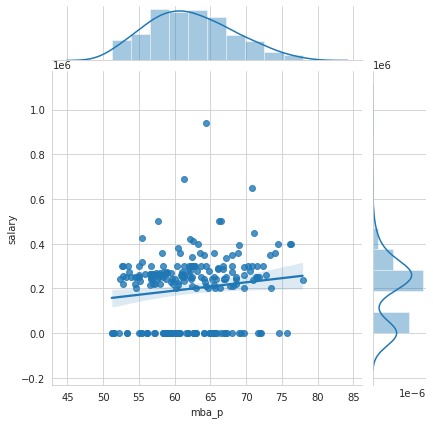

<Figure size 432x288 with 0 Axes>

In [19]:
for feature in numerical_features:
    plt.figure()
    if (feature != 'salary'):
        sns.jointplot(x = feature, y = "salary", data = data, kind = "reg")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


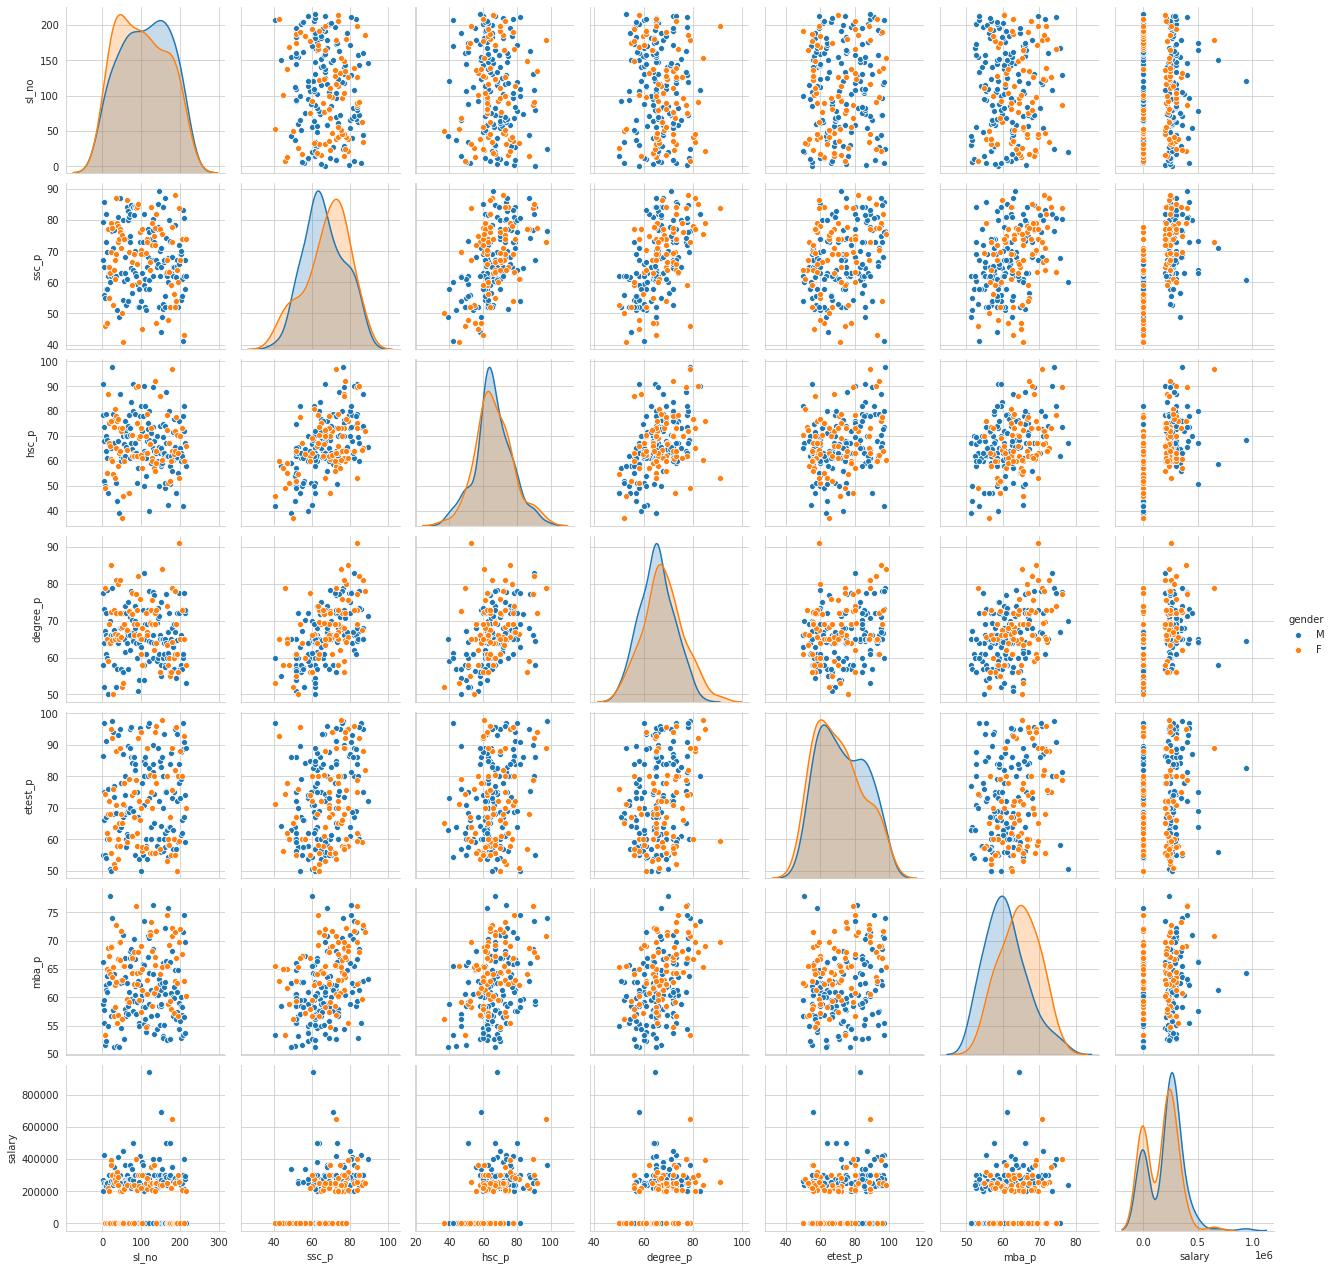

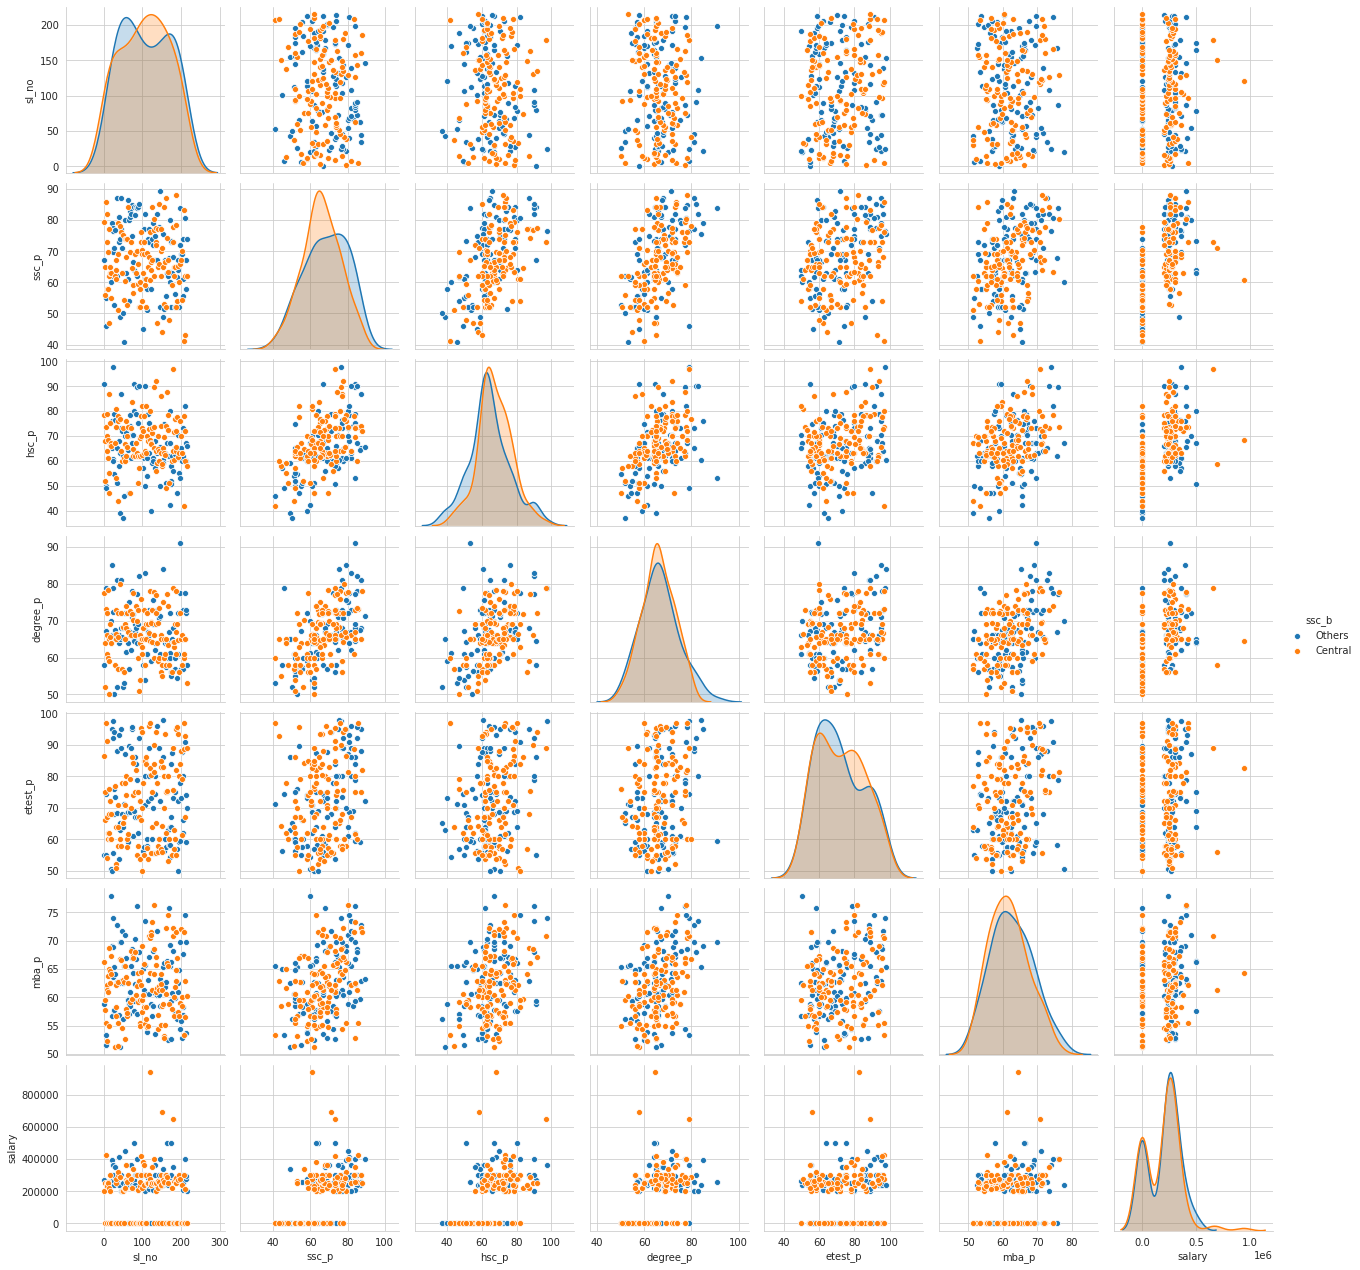

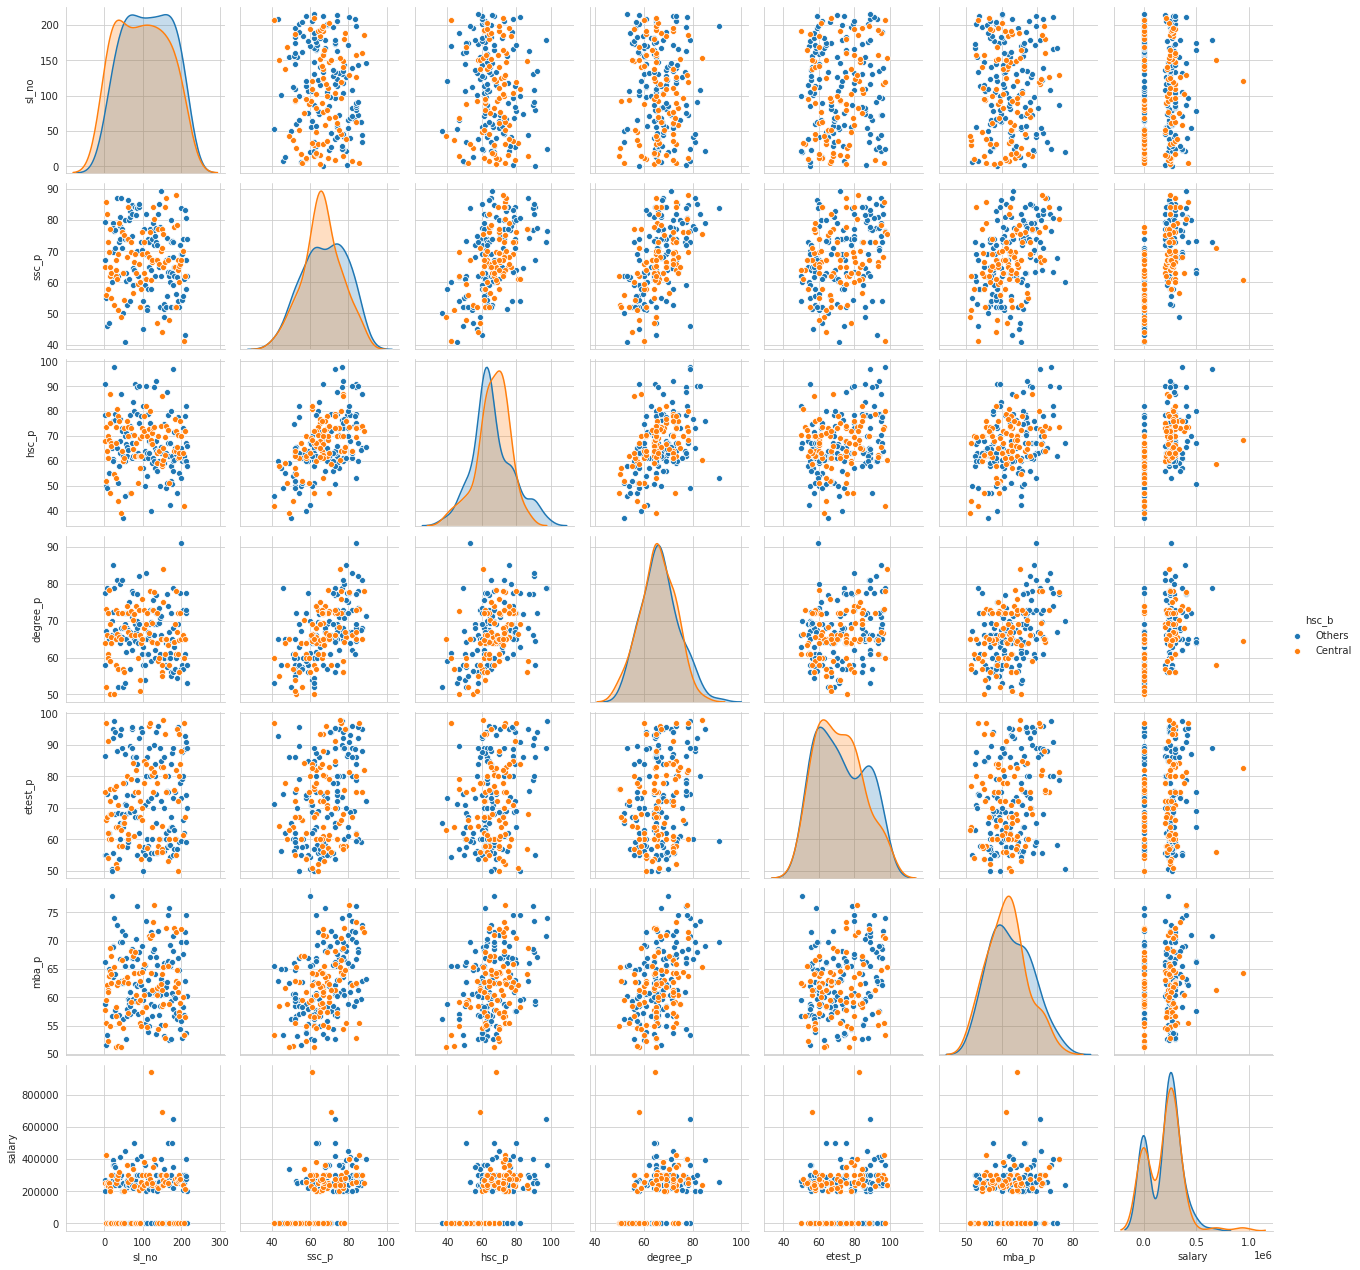

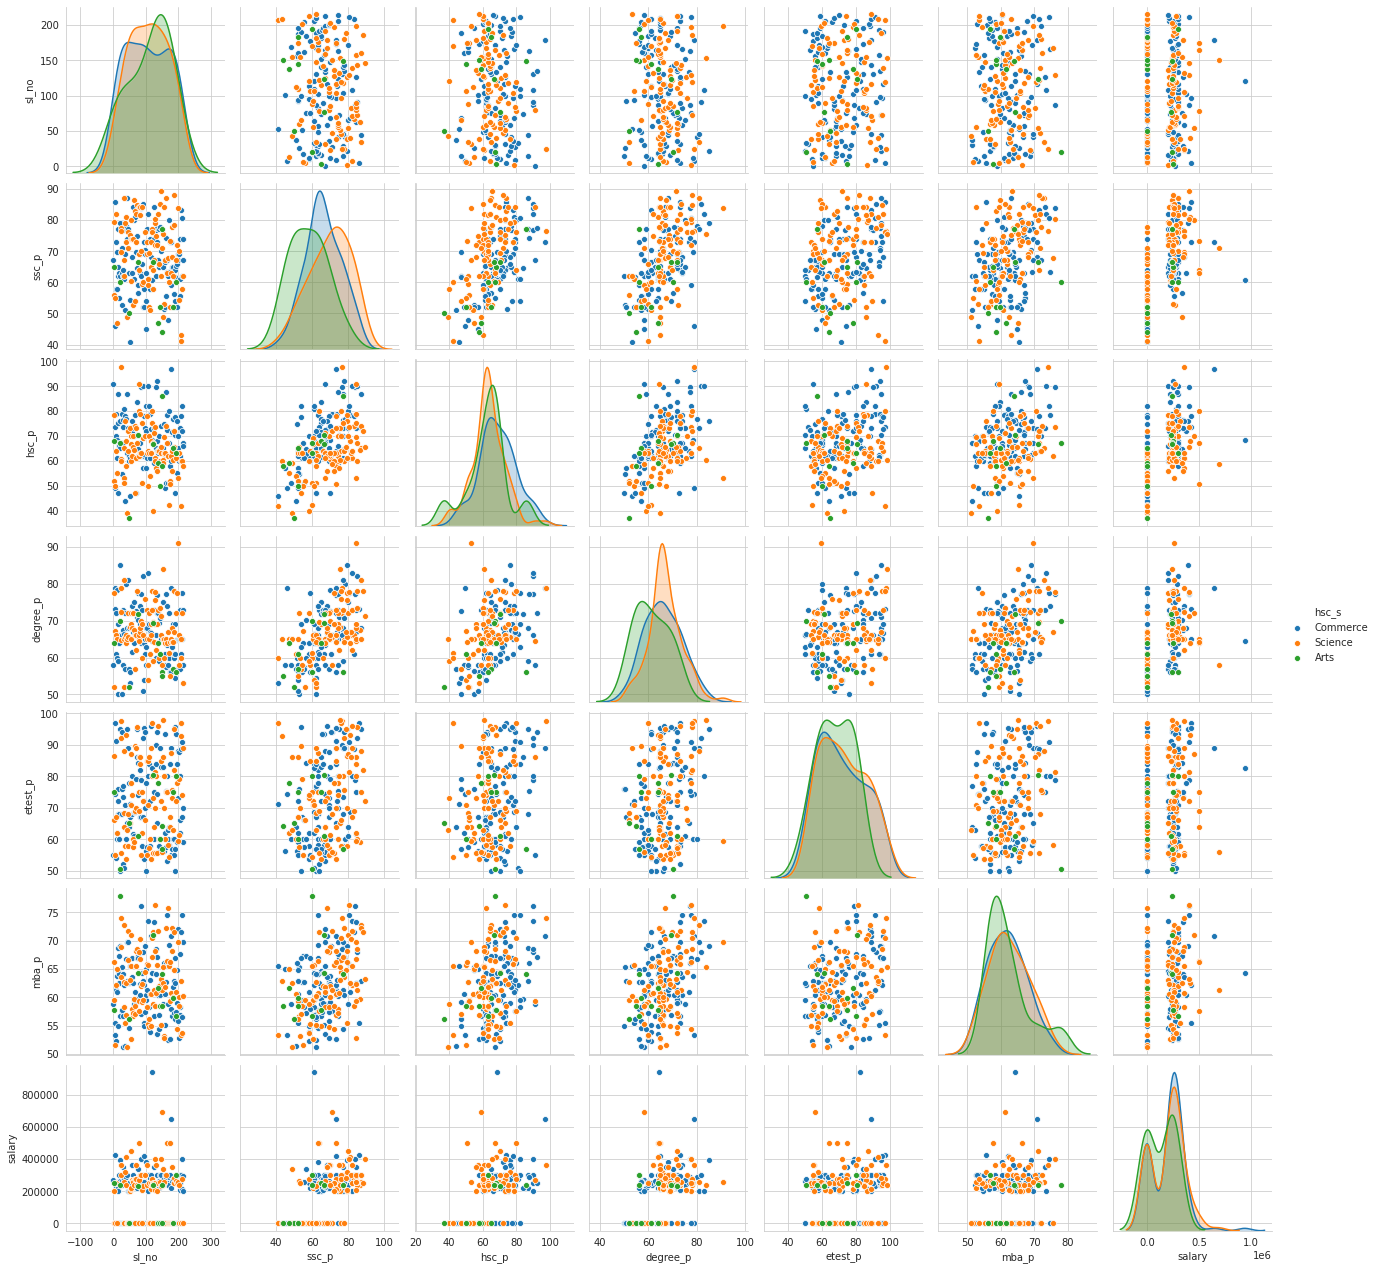

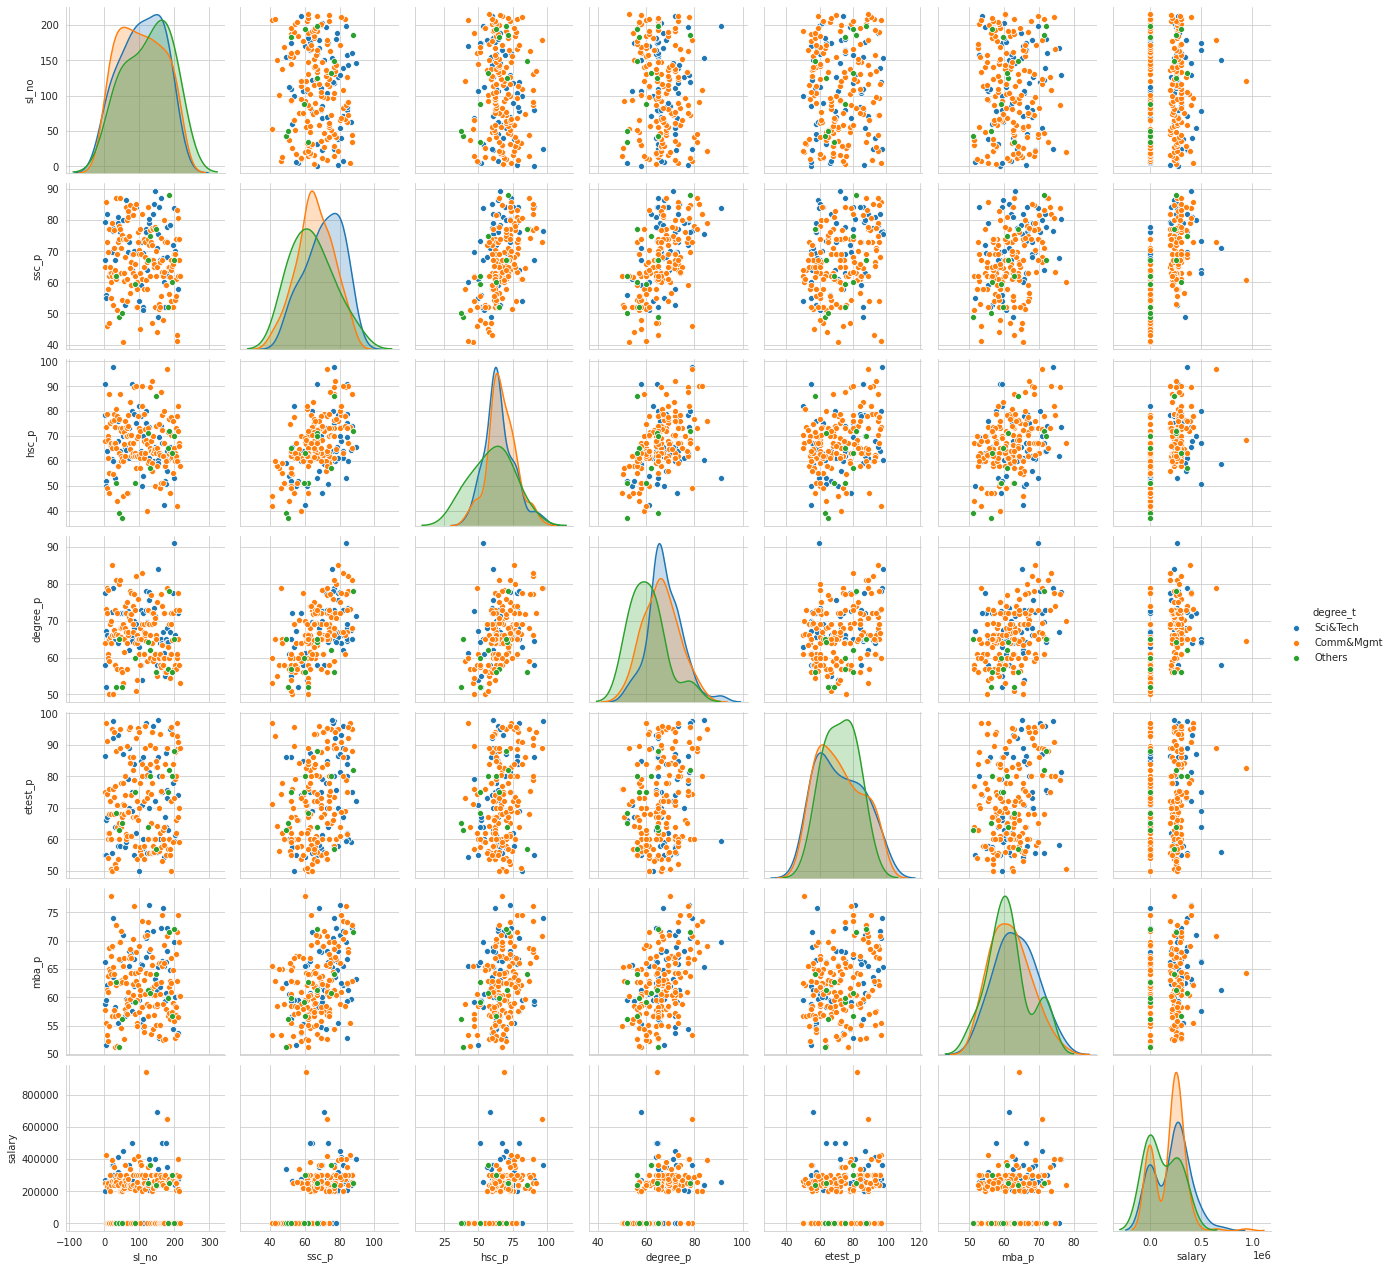

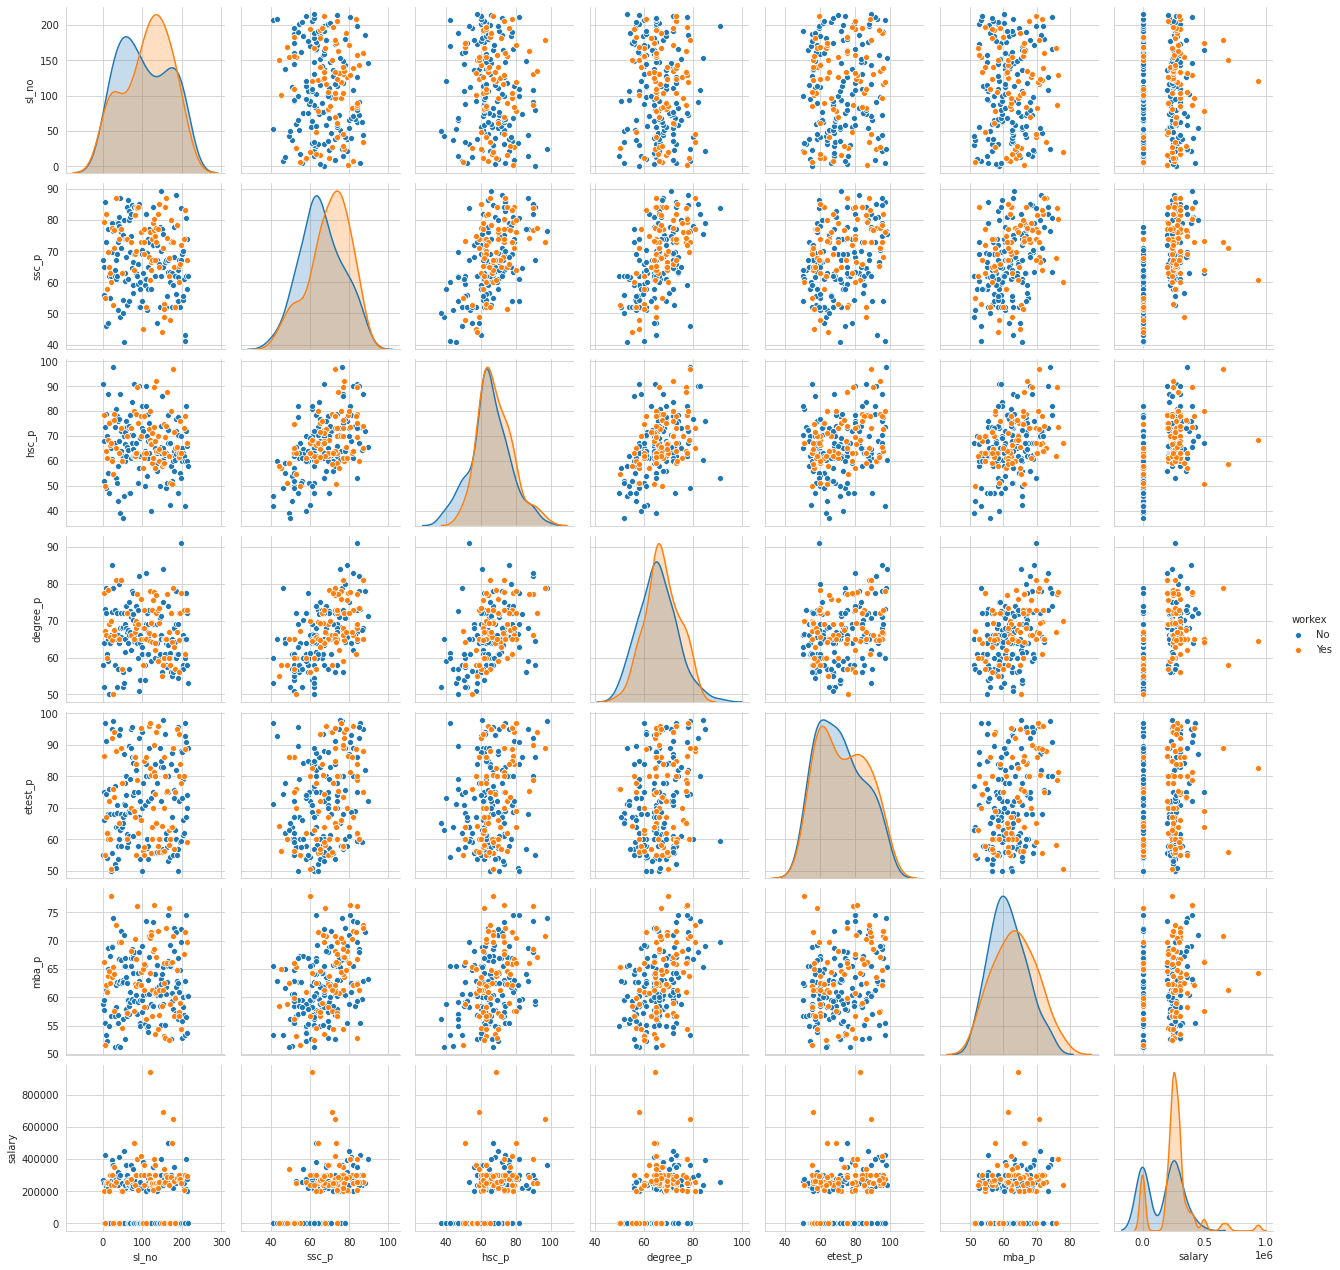

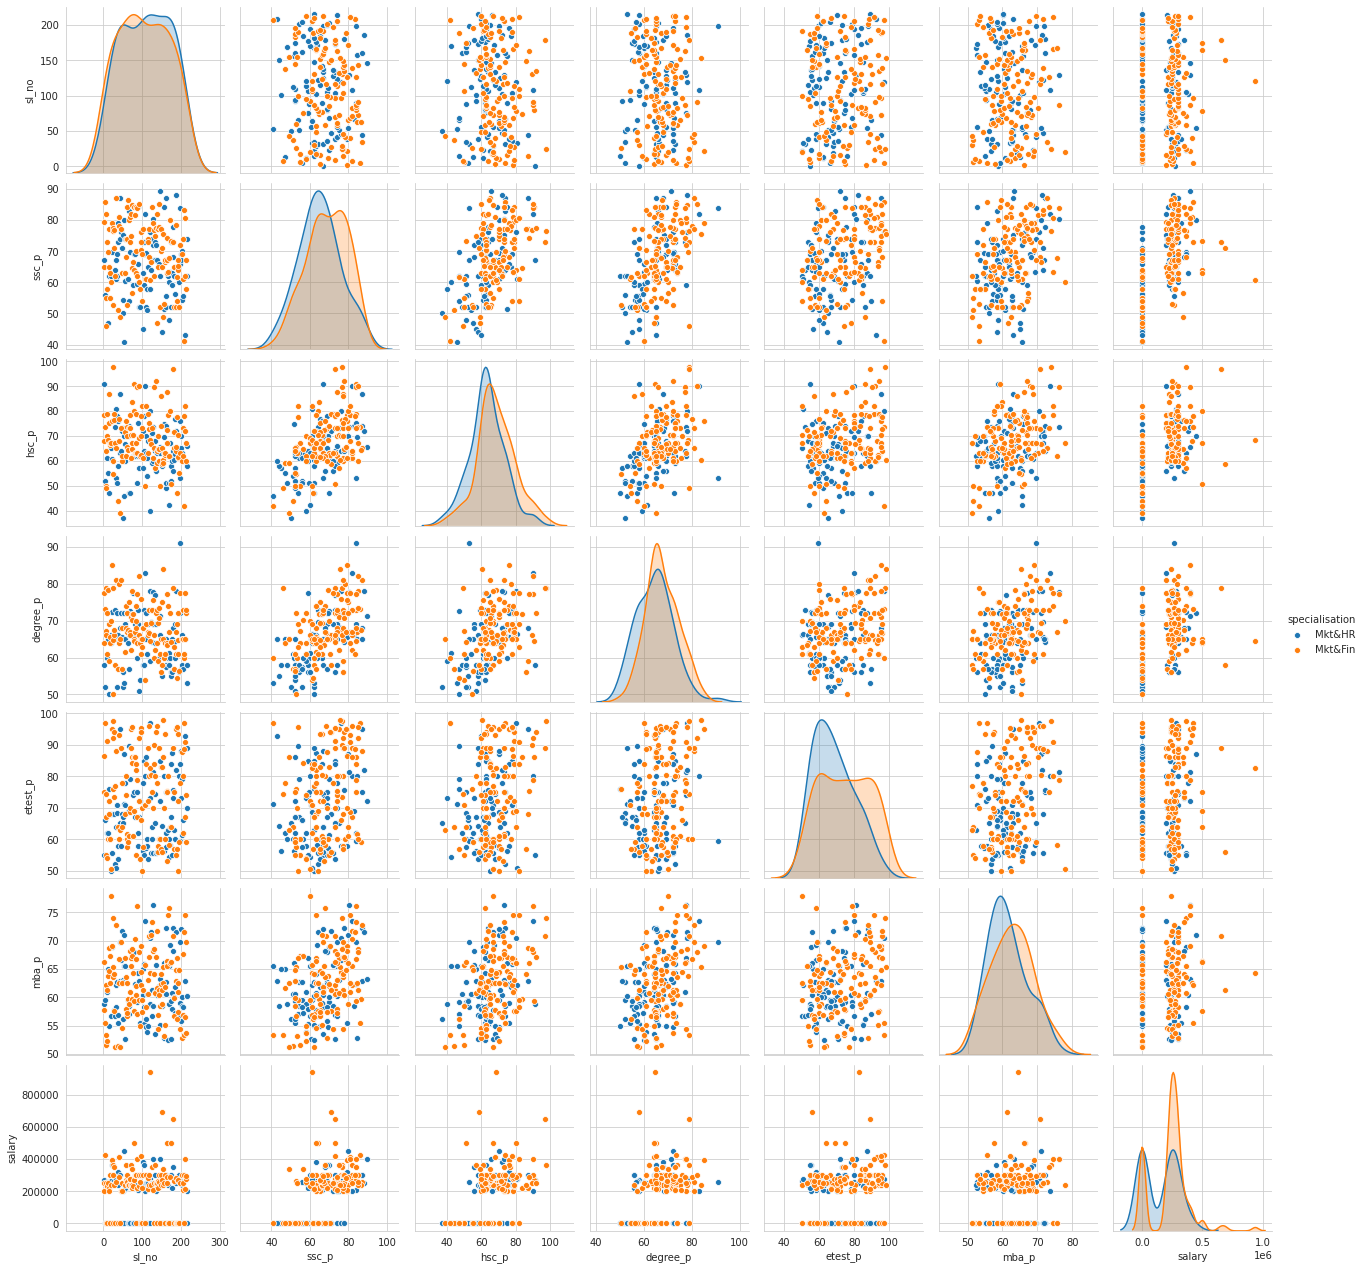

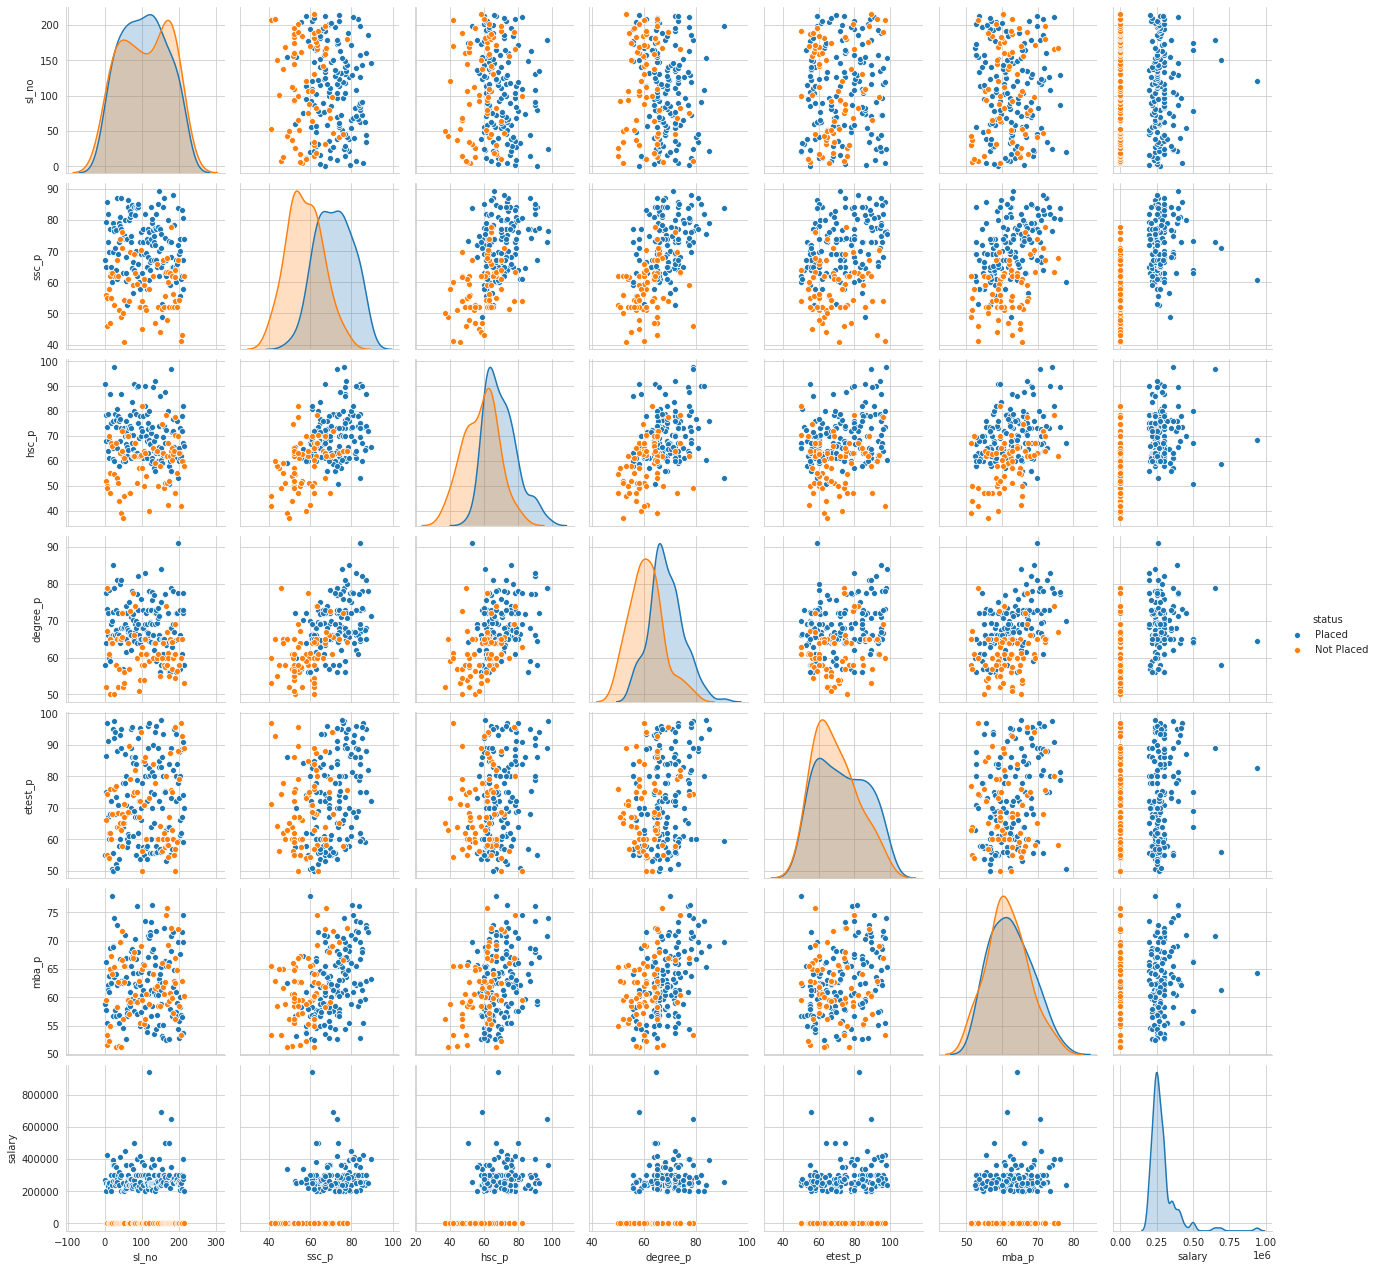

In [20]:
for feature in categorical_features:
    sns.pairplot(data, hue=feature)

In [21]:
numerical_features

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [22]:
categorical_features

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 432x288 with 0 Axes>

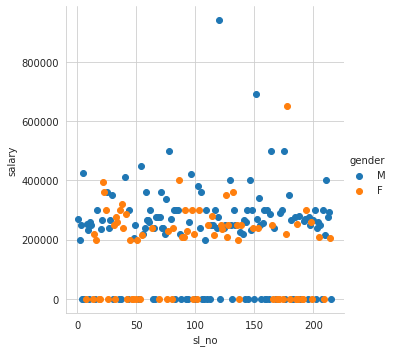

<Figure size 432x288 with 0 Axes>

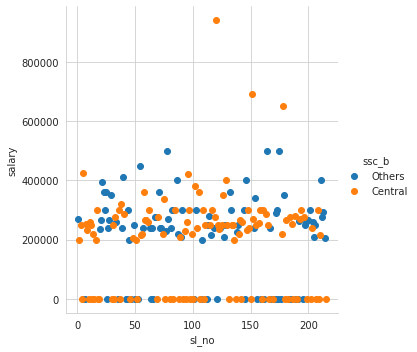

<Figure size 432x288 with 0 Axes>

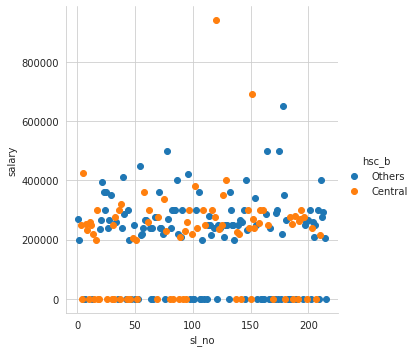

<Figure size 432x288 with 0 Axes>

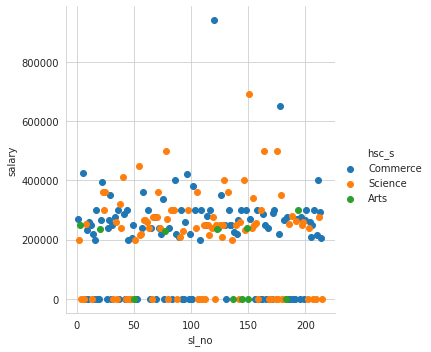

<Figure size 432x288 with 0 Axes>

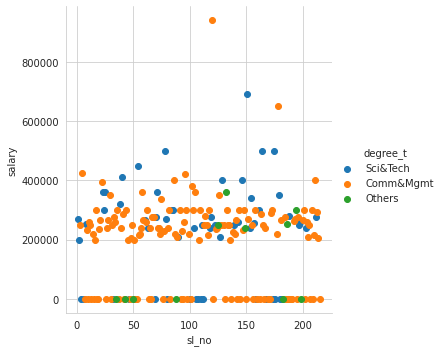

<Figure size 432x288 with 0 Axes>

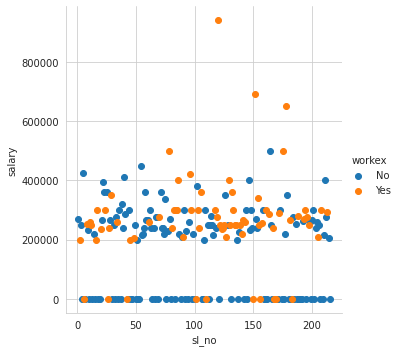

<Figure size 432x288 with 0 Axes>

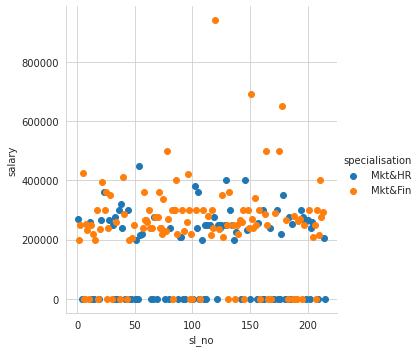

<Figure size 432x288 with 0 Axes>

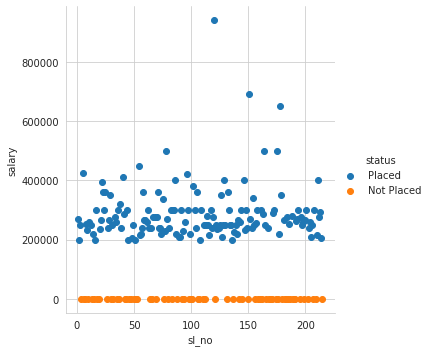

<Figure size 432x288 with 0 Axes>

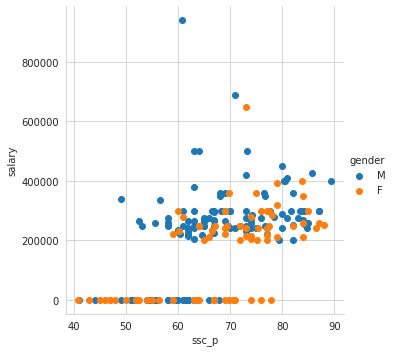

<Figure size 432x288 with 0 Axes>

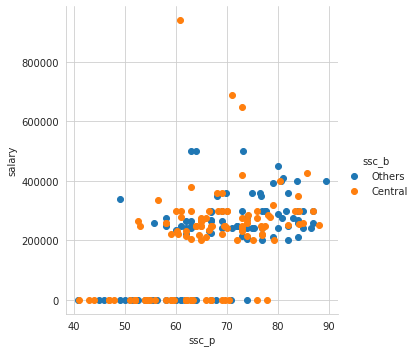

<Figure size 432x288 with 0 Axes>

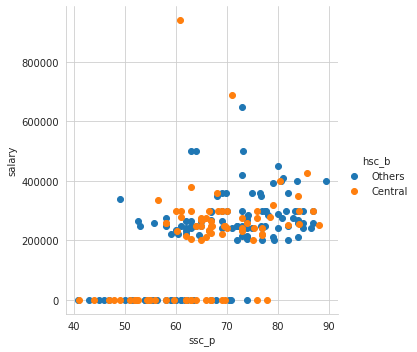

<Figure size 432x288 with 0 Axes>

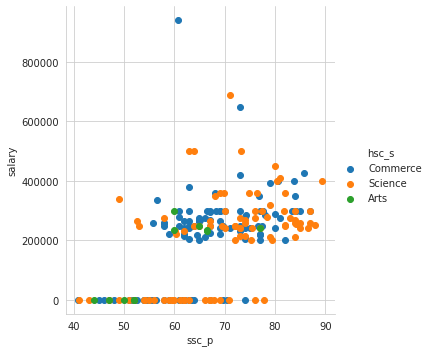

<Figure size 432x288 with 0 Axes>

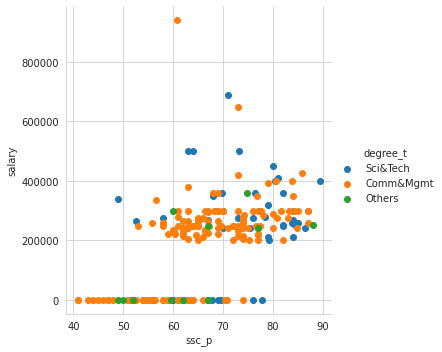

<Figure size 432x288 with 0 Axes>

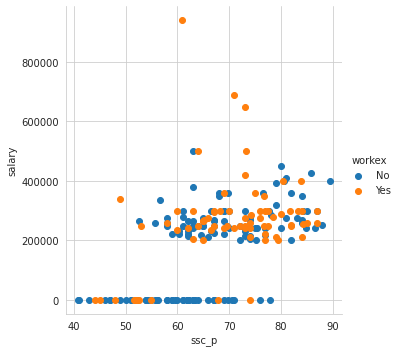

<Figure size 432x288 with 0 Axes>

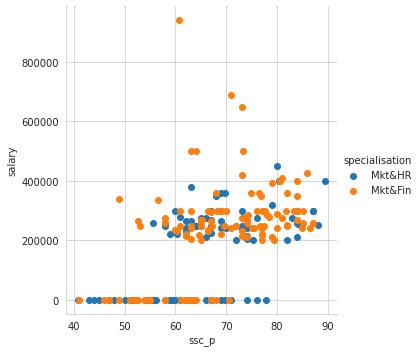

<Figure size 432x288 with 0 Axes>

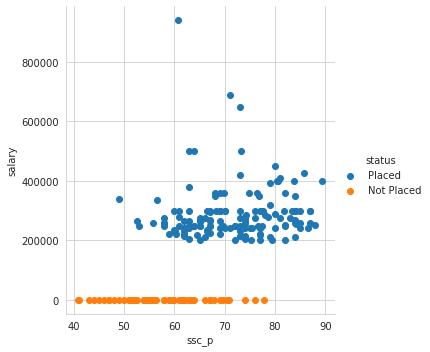

<Figure size 432x288 with 0 Axes>

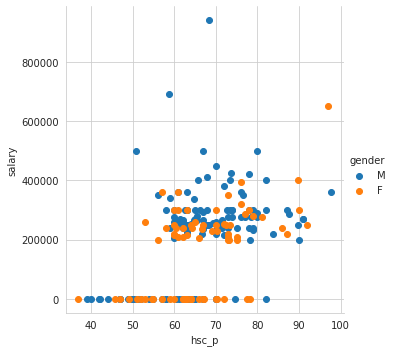

<Figure size 432x288 with 0 Axes>

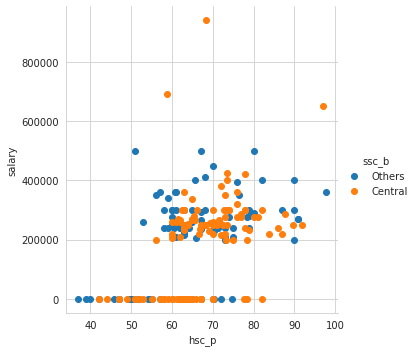

<Figure size 432x288 with 0 Axes>

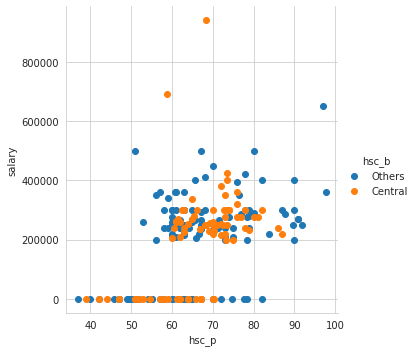

<Figure size 432x288 with 0 Axes>

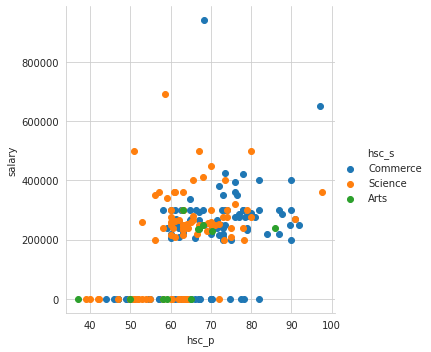

<Figure size 432x288 with 0 Axes>

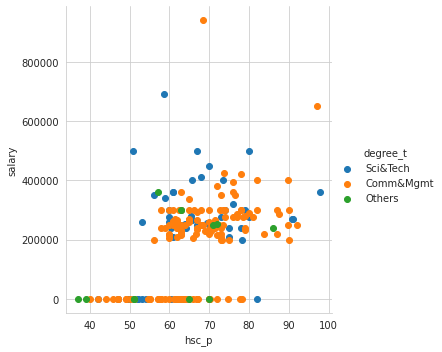

<Figure size 432x288 with 0 Axes>

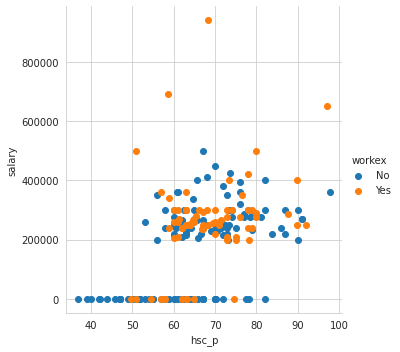

<Figure size 432x288 with 0 Axes>

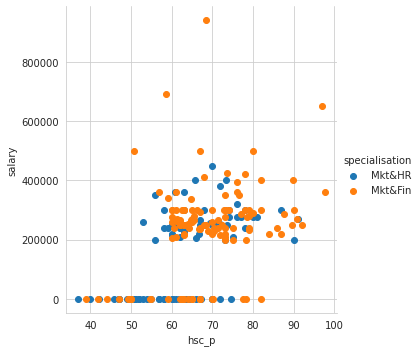

<Figure size 432x288 with 0 Axes>

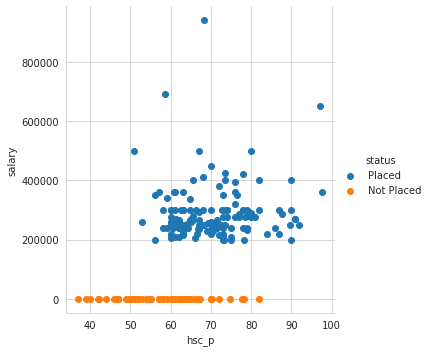

<Figure size 432x288 with 0 Axes>

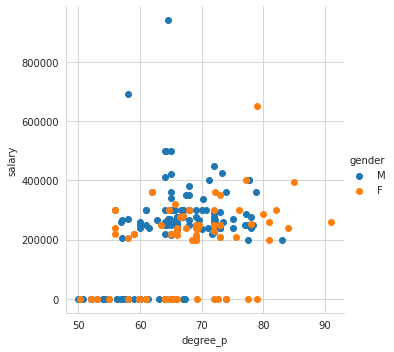

<Figure size 432x288 with 0 Axes>

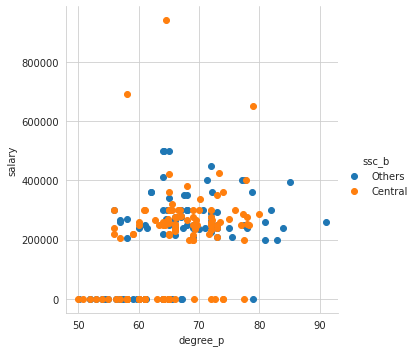

<Figure size 432x288 with 0 Axes>

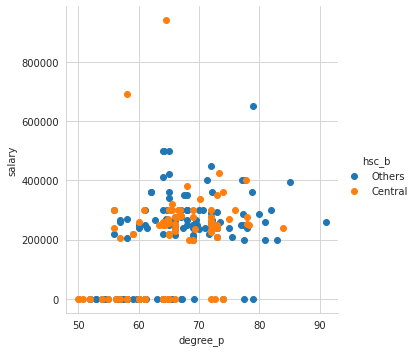

<Figure size 432x288 with 0 Axes>

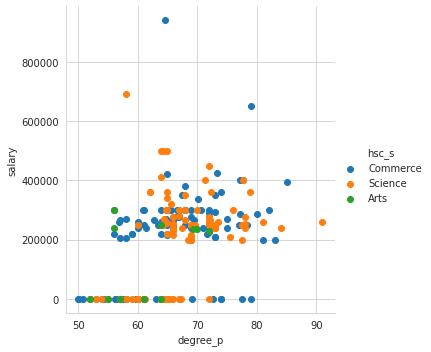

<Figure size 432x288 with 0 Axes>

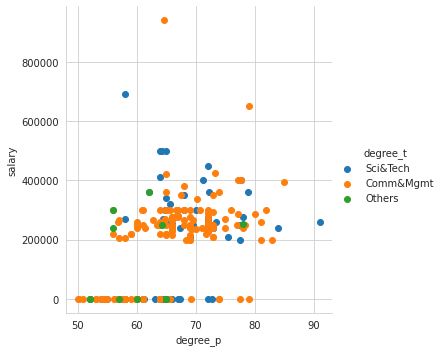

<Figure size 432x288 with 0 Axes>

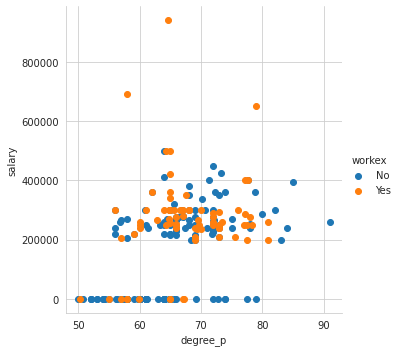

<Figure size 432x288 with 0 Axes>

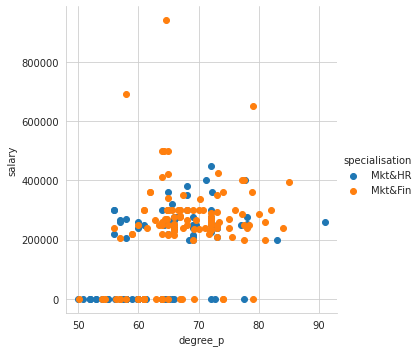

<Figure size 432x288 with 0 Axes>

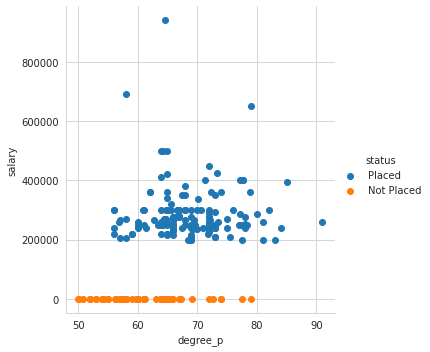

<Figure size 432x288 with 0 Axes>

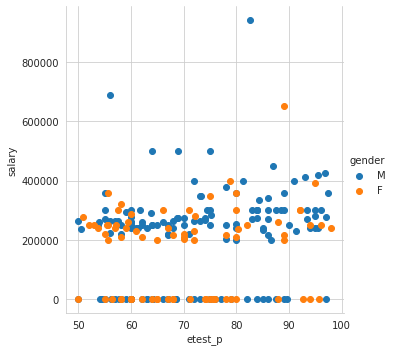

<Figure size 432x288 with 0 Axes>

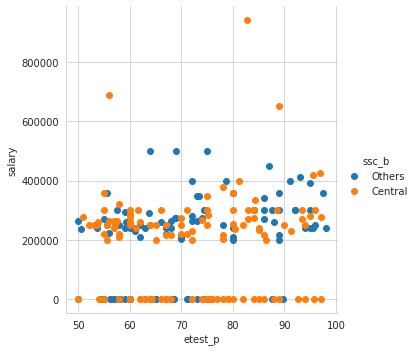

<Figure size 432x288 with 0 Axes>

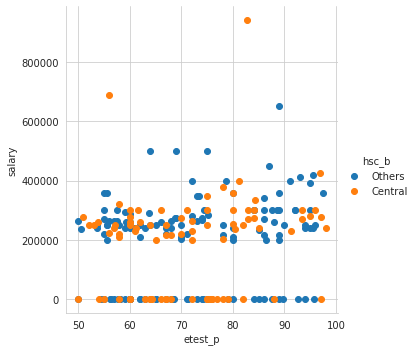

<Figure size 432x288 with 0 Axes>

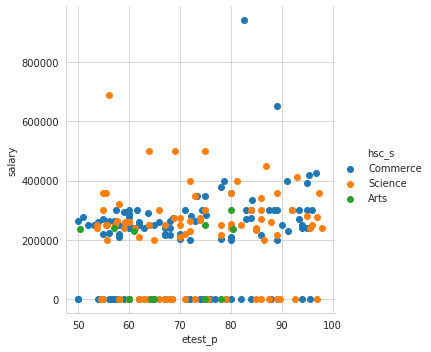

<Figure size 432x288 with 0 Axes>

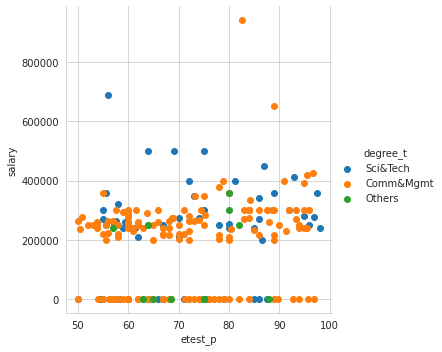

<Figure size 432x288 with 0 Axes>

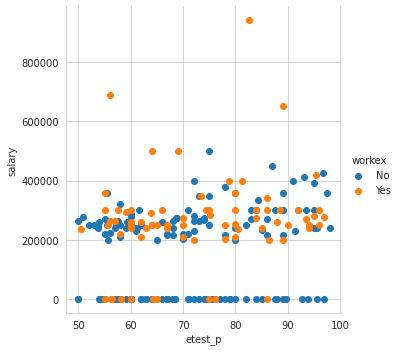

<Figure size 432x288 with 0 Axes>

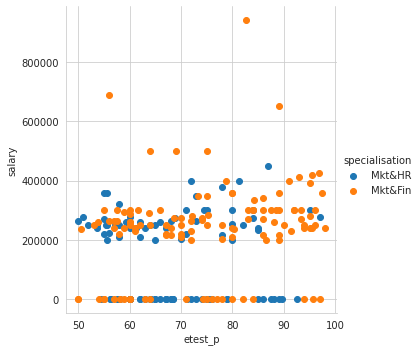

<Figure size 432x288 with 0 Axes>

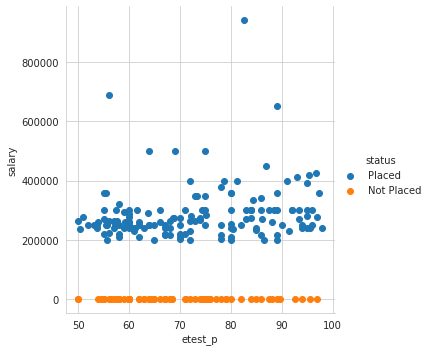

<Figure size 432x288 with 0 Axes>

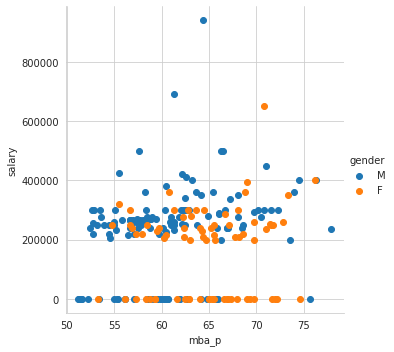

<Figure size 432x288 with 0 Axes>

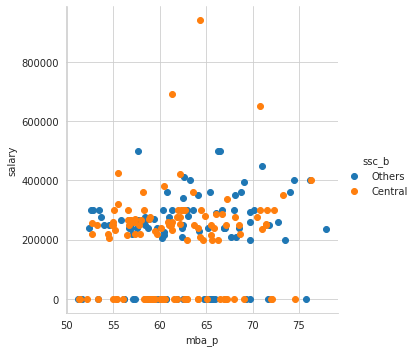

<Figure size 432x288 with 0 Axes>

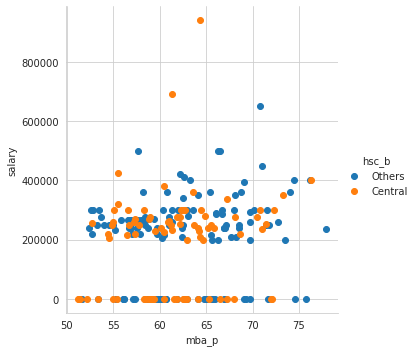

<Figure size 432x288 with 0 Axes>

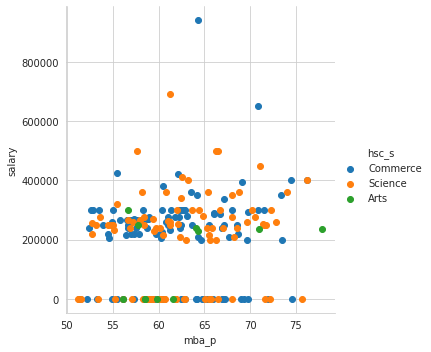

<Figure size 432x288 with 0 Axes>

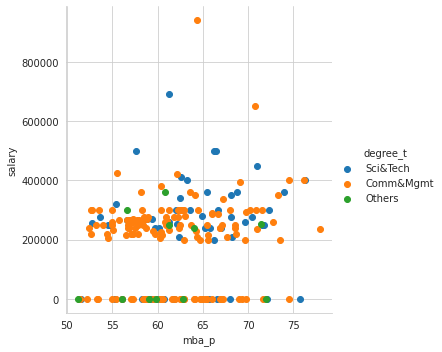

<Figure size 432x288 with 0 Axes>

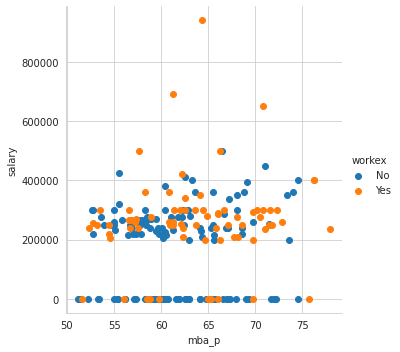

<Figure size 432x288 with 0 Axes>

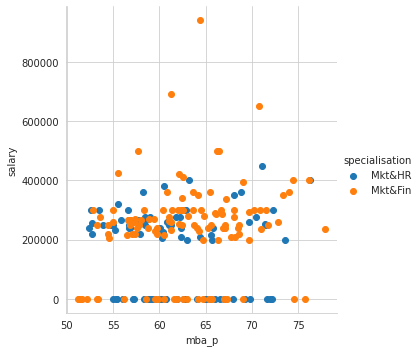

<Figure size 432x288 with 0 Axes>

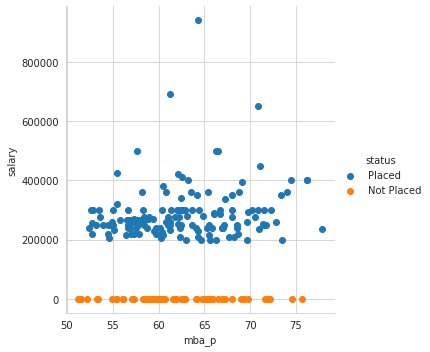

<Figure size 432x288 with 0 Axes>

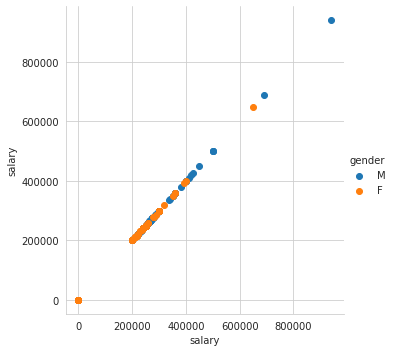

<Figure size 432x288 with 0 Axes>

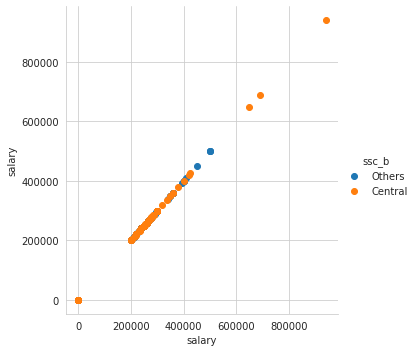

<Figure size 432x288 with 0 Axes>

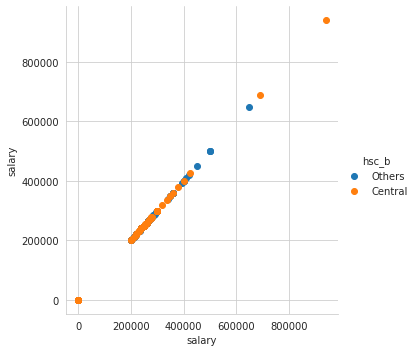

<Figure size 432x288 with 0 Axes>

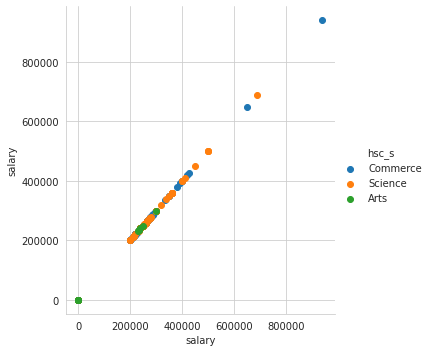

<Figure size 432x288 with 0 Axes>

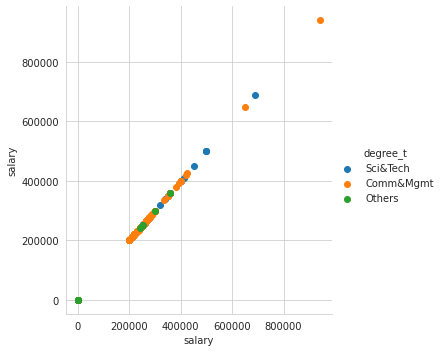

<Figure size 432x288 with 0 Axes>

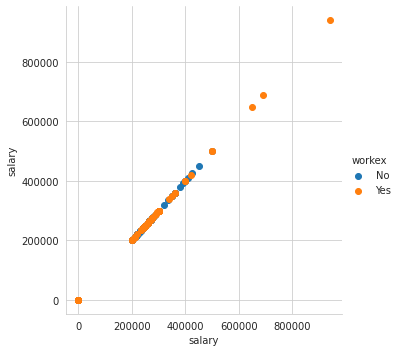

<Figure size 432x288 with 0 Axes>

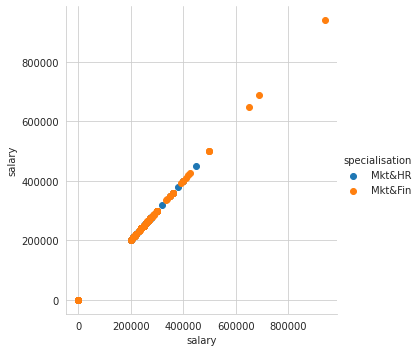

<Figure size 432x288 with 0 Axes>

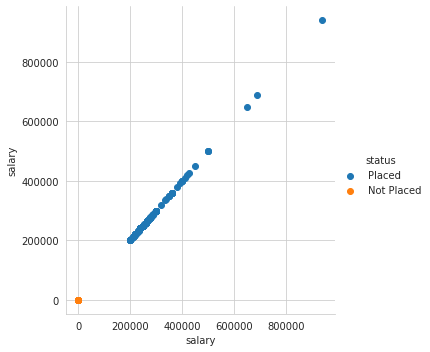

In [27]:
x, y = np.meshgrid(categorical_features, numerical_features)
for i, j in zip(x.ravel(),y.ravel()):
  plt.figure()
  sns.FacetGrid(data, hue=i, size=5).map(plt.scatter, j, "salary").add_legend()

In [28]:
from scipy.stats import chi2 

for feature in categorical_features:
  print("***************************************")
  print(pd.crosstab(data[feature], data['status']))
  data_table = pd.crosstab(data[feature], data['status'])
  val = stats.chi2_contingency(pd.crosstab(data[feature], data['status']))
  expected = val[3]
  observed = data_table.values
  noRows = len(data_table.iloc[0:2,0])
  noCols = len(data_table.iloc[0,0:2])
  ddof = (noRows-1)*(noCols-1)
  print("Degree of Freedom:- \t",ddof)
  alpha = 0.05
  chi_square=sum([(o-e)**2./e for o,e in zip(observed,expected)])
  chi_square_statistic=chi_square[0]+chi_square[1]
  p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
  critical_value=chi2.ppf(q=1-alpha,df=ddof)
  print('critical_value:\t\t',critical_value)
  print("chi-square statistic:-\t",chi_square_statistic)
  print('p-value:\t\t',p_value)
  print('Significance level: \t',alpha)
  print('Degree of Freedom: \t',ddof)

  if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
  else:
    print("Retain H0,There is no relationship between 2 categorical variables")
      
  if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
  else:
    print("Retain H0,There is no relationship between 2 categorical variables")
  print("***************************************")


  


***************************************
status  Not Placed  Placed
gender                    
F               28      48
M               39     100
Degree of Freedom:- 	 1
critical_value:		 3.841458820694124
chi-square statistic:-	 1.7675410212158507
p-value:		 0.1836866900162274
Significance level: 	 0.05
Degree of Freedom: 	 1
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
***************************************
***************************************
status   Not Placed  Placed
ssc_b                      
Central          38      78
Others           29      70
Degree of Freedom:- 	 1
critical_value:		 3.841458820694124
chi-square statistic:-	 0.29907141268438175
p-value:		 0.584465148011595
Significance level: 	 0.05
Degree of Freedom: 	 1
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
**************************

In [29]:
from scipy.stats import ttest_1samp

for feature in numerical_features:
  ttest,p_value=stats.ttest_ind(a=data[feature],b=data['salary'],equal_var=False)
  print("**************************")
  print(feature, "(P-Value)\t", p_value)
  if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
  else:
    print("we are accepting null hypothesis")
  print("**************************")


**************************
sl_no (P-Value)	 3.0276588233021024e-47
 we are rejecting null hypothesis
**************************
**************************
ssc_p (P-Value)	 2.9458164513373285e-47
 we are rejecting null hypothesis
**************************
**************************
hsc_p (P-Value)	 2.9438924662546737e-47
 we are rejecting null hypothesis
**************************
**************************
degree_p (P-Value)	 2.94396593444865e-47
 we are rejecting null hypothesis
**************************
**************************
etest_p (P-Value)	 2.9553477469470765e-47
 we are rejecting null hypothesis
**************************
**************************
mba_p (P-Value)	 2.9358651096732796e-47
 we are rejecting null hypothesis
**************************
**************************
salary (P-Value)	 1.0
we are accepting null hypothesis
**************************


In [30]:
_,p_value=stats.ttest_ind(a=data['ssc_p'],b=data['salary'],equal_var=False)
if p_value < 0.05:
  print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

 we are rejecting null hypothesis


In [31]:
df_anova = data[['salary','gender']]
grps = pd.unique(df_anova.gender.values)
d_data = {grp:df_anova['salary'][df_anova.gender == grp] for grp in grps}
F, p = stats.f_oneway(d_data['F'], d_data['M'])
print("Salary and Gender ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Salary and Gender  0.03599560646745157
reject null hypothesis


In [32]:
df_anova = data[['salary','ssc_b']]
grps = pd.unique(df_anova.ssc_b.values)
d_data = {grp:df_anova['salary'][df_anova.ssc_b == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Central'], d_data['Others'])
print("Salary and SSC_b ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Salary and SSC_b  0.6139510180995321
accept null hypothesis


In [33]:
df_anova = data[['salary','hsc_b']]
grps = pd.unique(df_anova.hsc_b.values)
d_data = {grp:df_anova['salary'][df_anova.hsc_b == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Central'], d_data['Others'])
print("Salary and HSC_b ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Salary and HSC_b  0.8663592108618725
accept null hypothesis


In [34]:
df_anova = data[['salary','hsc_s']]
grps = pd.unique(df_anova.hsc_s.values)
d_data = {grp:df_anova['salary'][df_anova.hsc_s == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Arts'], d_data['Commerce'], d_data['Science'])
print("Salary and HSC_s ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Salary and HSC_s  0.38104960487007955
accept null hypothesis


In [35]:
df_anova = data[['salary','degree_t']]
grps = pd.unique(df_anova.degree_t.values)
d_data = {grp:df_anova['salary'][df_anova.degree_t == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Comm&Mgmt'], d_data['Others'], d_data['Sci&Tech'])
print("Salary and Degree_T ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Salary and Degree_T  0.18753016536343384
accept null hypothesis


In [36]:
df_anova = data[['salary','workex']]
grps = pd.unique(df_anova.workex.values)
d_data = {grp:df_anova['salary'][df_anova.workex == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Yes'], d_data['No'])
print("Salary and workex ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Salary and workex  8.589295809231207e-06
reject null hypothesis


In [37]:
df_anova = data[['salary','specialisation']]
grps = pd.unique(df_anova.specialisation.values)
d_data = {grp:df_anova['salary'][df_anova.specialisation == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Mkt&Fin'], d_data['Mkt&HR'])
print("Salary and specialisation ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Salary and specialisation  4.136345489431701e-05
reject null hypothesis


In [38]:
df_anova = data[['salary','status']]
grps = pd.unique(df_anova.status.values)
d_data = {grp:df_anova['salary'][df_anova.status == grp] for grp in grps}
F, p = stats.f_oneway(d_data['Not Placed'], d_data['Placed'])
print("Salary and Status ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

Salary and Status  5.758994917008279e-66
reject null hypothesis


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [40]:
for feature in categorical_features:
    temp=data.groupby(feature)['salary'].count()/len(data)
    print(temp)
    print("********************************")

gender
F    0.353488
M    0.646512
Name: salary, dtype: float64
********************************
ssc_b
Central    0.539535
Others     0.460465
Name: salary, dtype: float64
********************************
hsc_b
Central    0.390698
Others     0.609302
Name: salary, dtype: float64
********************************
hsc_s
Arts        0.051163
Commerce    0.525581
Science     0.423256
Name: salary, dtype: float64
********************************
degree_t
Comm&Mgmt    0.674419
Others       0.051163
Sci&Tech     0.274419
Name: salary, dtype: float64
********************************
workex
No     0.655814
Yes    0.344186
Name: salary, dtype: float64
********************************
specialisation
Mkt&Fin    0.55814
Mkt&HR     0.44186
Name: salary, dtype: float64
********************************
status
Not Placed    0.311628
Placed        0.688372
Name: salary, dtype: float64
********************************


In [41]:
data.drop(['sl_no'], axis = 1, inplace=True)
data = pd.get_dummies(data, drop_first=True)

In [42]:
data.head()

ssc_p  hsc_p  degree_p  etest_p  mba_p    salary  gender_M  ssc_b_Others  \
0  67.00  91.00     58.00     55.0  58.80  270000.0         1             1   
1  79.33  78.33     77.48     86.5  66.28  200000.0         1             0   
2  65.00  68.00     64.00     75.0  57.80  250000.0         1             0   
3  56.00  52.00     52.00     66.0  59.43       0.0         1             0   
4  85.80  73.60     73.30     96.8  55.50  425000.0         1             0   

   hsc_b_Others  hsc_s_Commerce  hsc_s_Science  degree_t_Others  \
0             1               1              0                0   
1             1               0              1                0   
2             0               0              0                0   
3             0               0              1                0   
4             0               1              0                0   

   degree_t_Sci&Tech  workex_Yes  specialisation_Mkt&HR  status_Placed  
0                  1           0                      1              1  
1                  1           1                      0              1  
2                  0           0                      0              1  
3                  1           0                      1              0  
4                  0           0                      0              1

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ssc_p                  215 non-null    float64
 1   hsc_p                  215 non-null    float64
 2   degree_p               215 non-null    float64
 3   etest_p                215 non-null    float64
 4   mba_p                  215 non-null    float64
 5   salary                 215 non-null    float64
 6   gender_M               215 non-null    uint8  
 7   ssc_b_Others           215 non-null    uint8  
 8   hsc_b_Others           215 non-null    uint8  
 9   hsc_s_Commerce         215 non-null    uint8  
 10  hsc_s_Science          215 non-null    uint8  
 11  degree_t_Others        215 non-null    uint8  
 12  degree_t_Sci&Tech      215 non-null    uint8  
 13  workex_Yes             215 non-null    uint8  
 14  specialisation_Mkt&HR  215 non-null    uint8  
 15  status

In [44]:
from sklearn.preprocessing import RobustScaler  #to properly handle outliers

In [45]:
scaler = RobustScaler()
scaled_data = data.copy()
scaled_data[[feature for feature in numerical_features if feature!='sl_no']] = scaler.fit_transform(data[[feature for feature in numerical_features if feature!='sl_no']])

In [46]:
scaled_data.head()

ssc_p     hsc_p  degree_p   etest_p     mba_p    salary  gender_M  \
0  0.000000  2.148760 -0.727273 -0.680851 -0.385078  0.106195         1   
1  0.816556  1.101653  1.043636  0.659574  0.515042 -0.141593         1   
2 -0.132450  0.247934 -0.181818  0.170213 -0.505415  0.035398         1   
3 -0.728477 -1.074380 -1.272727 -0.212766 -0.309266 -0.849558         1   
4  1.245033  0.710744  0.663636  1.097872 -0.782190  0.654867         1   

   ssc_b_Others  hsc_b_Others  hsc_s_Commerce  hsc_s_Science  degree_t_Others  \
0             1             1               1              0                0   
1             0             1               0              1                0   
2             0             0               0              0                0   
3             0             0               0              1                0   
4             0             0               1              0                0   

   degree_t_Sci&Tech  workex_Yes  specialisation_Mkt&HR  status_Placed  
0                  1           0                      1              1  
1                  1           1                      0              1  
2                  0           0                      0              1  
3                  1           0                      1              0  
4                  0           0                      0              1

In [47]:
scaled_data.to_csv('X_train.csv',index=False)